In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import sys
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
test = pd.read_csv("/home/sir/Documents/mercedes/test.csv") # test has no y value, y comes from train split
train = pd.read_csv("/home/sir/Documents/mercedes/train.csv")

uniq = {}
#dummyvariables
for colname in ['X0', 'X1', 'X2','X3','X4','X5','X6','X8']:
    uniq[colname] = train[colname].unique()
for colname in ['X0', 'X1', 'X2','X3','X4','X5','X6','X8']:
    train[colname] = train[colname].apply(lambda x: np.where(uniq[colname] == x)[0][0])

In [3]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,0,1,1,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,1,2,2,2,0,2,0,1,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,1,1,2,3,0,2,1,2,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,1,0,2,3,0,3,2,3,...,0,0,0,0,0,0,0,0,0,0


In [44]:
data = np.asarray(train)
X,y = data[:, 2:], data[:, 1]
lr = LinearRegression()
lr.fit(X, y)
lr.coef_ # which factors are most importante
lr.intercept_
lr.score(X,y)

0.59196992348988053

In [28]:
data = np.asarray(train)
X,y = data[:, 2:], data[:, 1]
lr = LassoLars(alpha=0.01)
lr.fit(X, y)
lr.coef_ # which factors are most importante
lr.intercept_
lr.score(X,y)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.682e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.054e-08
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.706e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 1.054e-08
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.706e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_m

0.54101214531137609

In [6]:
data = np.asarray(train)
X,y = data[:, 2:], data[:, 1]
lr = SGDRegressor()
lr.fit(X, y)
lr.score(X,y)

NameError: name 'SGDRegressor' is not defined

In [29]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
gbr.fit(X,y)
gbr.score(X,y)


0.62448863253826614

In [9]:
import xgboost as xgb

In [38]:
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import sys
print("My shit: regression")
kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBRegressor().fit(X[train_index],y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    sys.stdout.write('\r' + str(r2_score(actuals, predictions)))
    sys.stdout.flush()

My shit: regression
0.642482844435

In [81]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dropout
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
from keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

#Red data from csv file for training and validation data
X_train, y_train, X_test, y_test = X[:int(len(x)*.8)], y[:int(len(x)*.8)], X[int(len(x)*.8):], y[int(len(x)*.8):]



# create model
model = Sequential()
model.add(Dense(20, activation="selu", kernel_initializer="uniform", input_shape=(376,)))
model.add(Dense(1, activation="linear", kernel_initializer="uniform"))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=[r2_keras])

# Fit the model
history = model.fit(X_train, y_train, epochs=15000, batch_size=10,  verbose=2)

# Calculate predictions
PredTestSet = model.predict(X_train)
PredValSet = model.predict(X_test)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")
                                                    


Epoch 1/15000
0s - loss: 3007.8771 - r2_keras: -2.6503e+01
Epoch 2/15000
0s - loss: 256.8576 - r2_keras: -1.1566e+00
Epoch 3/15000
0s - loss: 207.0541 - r2_keras: -6.1939e-01
Epoch 4/15000
0s - loss: 166.6667 - r2_keras: -3.5150e-01
Epoch 5/15000
0s - loss: 135.6355 - r2_keras: -4.5180e-03
Epoch 6/15000
0s - loss: 114.0668 - r2_keras: 0.1333
Epoch 7/15000
0s - loss: 100.5635 - r2_keras: 0.3100
Epoch 8/15000
0s - loss: 91.7624 - r2_keras: 0.3726
Epoch 9/15000
0s - loss: 86.4379 - r2_keras: 0.4306
Epoch 10/15000
0s - loss: 82.6251 - r2_keras: 0.4628
Epoch 11/15000
0s - loss: 80.4997 - r2_keras: 0.4680
Epoch 12/15000
0s - loss: 78.4440 - r2_keras: 0.4669
Epoch 13/15000
0s - loss: 76.9762 - r2_keras: 0.4982
Epoch 14/15000
0s - loss: 76.5593 - r2_keras: 0.4939
Epoch 15/15000
0s - loss: 74.8933 - r2_keras: 0.5198
Epoch 16/15000
0s - loss: 74.3756 - r2_keras: 0.5231
Epoch 17/15000
0s - loss: 74.0713 - r2_keras: 0.5305
Epoch 18/15000
0s - loss: 73.2260 - r2_keras: 0.5235
Epoch 19/15000
0s - lo

0s - loss: 51.6946 - r2_keras: 0.6389
Epoch 155/15000
0s - loss: 51.4815 - r2_keras: 0.6657
Epoch 156/15000
0s - loss: 51.0624 - r2_keras: 0.6570
Epoch 157/15000
0s - loss: 51.8596 - r2_keras: 0.6523
Epoch 158/15000
0s - loss: 51.1681 - r2_keras: 0.6582
Epoch 159/15000
0s - loss: 51.2359 - r2_keras: 0.6537
Epoch 160/15000
0s - loss: 51.3153 - r2_keras: 0.6595
Epoch 161/15000
0s - loss: 51.4434 - r2_keras: 0.6447
Epoch 162/15000
0s - loss: 50.8567 - r2_keras: 0.6556
Epoch 163/15000
0s - loss: 51.3472 - r2_keras: 0.6526
Epoch 164/15000
0s - loss: 51.0787 - r2_keras: 0.6543
Epoch 165/15000
0s - loss: 51.1949 - r2_keras: 0.6458
Epoch 166/15000
0s - loss: 51.1953 - r2_keras: 0.6496
Epoch 167/15000
0s - loss: 50.9281 - r2_keras: 0.6473
Epoch 168/15000
0s - loss: 50.6607 - r2_keras: 0.6552
Epoch 169/15000
0s - loss: 51.0685 - r2_keras: 0.6611
Epoch 170/15000
0s - loss: 50.5970 - r2_keras: 0.6577
Epoch 171/15000
0s - loss: 50.5120 - r2_keras: 0.6546
Epoch 172/15000
0s - loss: 50.0201 - r2_kera

0s - loss: 46.0094 - r2_keras: 0.6794
Epoch 307/15000
0s - loss: 45.9765 - r2_keras: 0.6817
Epoch 308/15000
0s - loss: 45.6564 - r2_keras: 0.6865
Epoch 309/15000
0s - loss: 44.9893 - r2_keras: 0.6883
Epoch 310/15000
0s - loss: 46.1255 - r2_keras: 0.6751
Epoch 311/15000
0s - loss: 45.4706 - r2_keras: 0.6863
Epoch 312/15000
0s - loss: 45.4500 - r2_keras: 0.6862
Epoch 313/15000
0s - loss: 45.3143 - r2_keras: 0.6835
Epoch 314/15000
0s - loss: 45.3495 - r2_keras: 0.6934
Epoch 315/15000
0s - loss: 45.4029 - r2_keras: 0.6711
Epoch 316/15000
0s - loss: 45.3929 - r2_keras: 0.6854
Epoch 317/15000
0s - loss: 45.1665 - r2_keras: 0.6877
Epoch 318/15000
0s - loss: 45.2967 - r2_keras: 0.6922
Epoch 319/15000
0s - loss: 44.7580 - r2_keras: 0.6821
Epoch 320/15000
0s - loss: 45.2293 - r2_keras: 0.6807
Epoch 321/15000
0s - loss: 45.5519 - r2_keras: 0.6792
Epoch 322/15000
0s - loss: 45.3597 - r2_keras: 0.6666
Epoch 323/15000
0s - loss: 45.4610 - r2_keras: 0.6856
Epoch 324/15000
0s - loss: 45.1967 - r2_kera

0s - loss: 43.1249 - r2_keras: 0.6910
Epoch 459/15000
0s - loss: 42.3406 - r2_keras: 0.7086
Epoch 460/15000
0s - loss: 42.7627 - r2_keras: 0.7037
Epoch 461/15000
0s - loss: 42.6987 - r2_keras: 0.6978
Epoch 462/15000
0s - loss: 43.4574 - r2_keras: 0.6755
Epoch 463/15000
0s - loss: 42.9479 - r2_keras: 0.7039
Epoch 464/15000
0s - loss: 42.7744 - r2_keras: 0.7006
Epoch 465/15000
0s - loss: 42.7930 - r2_keras: 0.7074
Epoch 466/15000
0s - loss: 43.0070 - r2_keras: 0.6981
Epoch 467/15000
0s - loss: 42.6799 - r2_keras: 0.6908
Epoch 468/15000
0s - loss: 42.8578 - r2_keras: 0.6805
Epoch 469/15000
0s - loss: 43.1527 - r2_keras: 0.6821
Epoch 470/15000
0s - loss: 42.5208 - r2_keras: 0.6928
Epoch 471/15000
0s - loss: 42.8331 - r2_keras: 0.6891
Epoch 472/15000
0s - loss: 42.6040 - r2_keras: 0.7007
Epoch 473/15000
0s - loss: 42.5931 - r2_keras: 0.6940
Epoch 474/15000
0s - loss: 42.2856 - r2_keras: 0.6845
Epoch 475/15000
0s - loss: 42.6454 - r2_keras: 0.6947
Epoch 476/15000
0s - loss: 42.4727 - r2_kera

0s - loss: 41.3245 - r2_keras: 0.7129
Epoch 611/15000
0s - loss: 41.0120 - r2_keras: 0.7140
Epoch 612/15000
0s - loss: 41.2926 - r2_keras: 0.7055
Epoch 613/15000
0s - loss: 40.9574 - r2_keras: 0.7108
Epoch 614/15000
0s - loss: 41.1196 - r2_keras: 0.7123
Epoch 615/15000
0s - loss: 41.4254 - r2_keras: 0.7054
Epoch 616/15000
0s - loss: 41.2425 - r2_keras: 0.7089
Epoch 617/15000
0s - loss: 40.9772 - r2_keras: 0.7106
Epoch 618/15000
0s - loss: 41.2242 - r2_keras: 0.7080
Epoch 619/15000
0s - loss: 41.4636 - r2_keras: 0.7139
Epoch 620/15000
0s - loss: 41.2836 - r2_keras: 0.7114
Epoch 621/15000
0s - loss: 41.1718 - r2_keras: 0.6998
Epoch 622/15000
0s - loss: 40.9230 - r2_keras: 0.7189
Epoch 623/15000
0s - loss: 40.8292 - r2_keras: 0.7087
Epoch 624/15000
0s - loss: 41.6904 - r2_keras: 0.6925
Epoch 625/15000
0s - loss: 40.9148 - r2_keras: 0.7073
Epoch 626/15000
0s - loss: 40.9203 - r2_keras: 0.7132
Epoch 627/15000
0s - loss: 40.9658 - r2_keras: 0.7095
Epoch 628/15000
0s - loss: 40.8606 - r2_kera

0s - loss: 40.2665 - r2_keras: 0.7167
Epoch 763/15000
0s - loss: 40.0033 - r2_keras: 0.7172
Epoch 764/15000
0s - loss: 40.2936 - r2_keras: 0.7125
Epoch 765/15000
0s - loss: 40.1286 - r2_keras: 0.7058
Epoch 766/15000
0s - loss: 40.4144 - r2_keras: 0.7090
Epoch 767/15000
0s - loss: 40.1270 - r2_keras: 0.7127
Epoch 768/15000
0s - loss: 39.8377 - r2_keras: 0.7225
Epoch 769/15000
0s - loss: 40.3204 - r2_keras: 0.7115
Epoch 770/15000
0s - loss: 40.2469 - r2_keras: 0.7153
Epoch 771/15000
0s - loss: 40.1545 - r2_keras: 0.7108
Epoch 772/15000
0s - loss: 39.7691 - r2_keras: 0.7223
Epoch 773/15000
0s - loss: 40.0212 - r2_keras: 0.7169
Epoch 774/15000
0s - loss: 40.0667 - r2_keras: 0.7145
Epoch 775/15000
0s - loss: 40.1863 - r2_keras: 0.7165
Epoch 776/15000
0s - loss: 40.1146 - r2_keras: 0.7179
Epoch 777/15000
0s - loss: 39.8088 - r2_keras: 0.7151
Epoch 778/15000
0s - loss: 40.7723 - r2_keras: 0.7125
Epoch 779/15000
0s - loss: 39.9684 - r2_keras: 0.7212
Epoch 780/15000
0s - loss: 40.2019 - r2_kera

0s - loss: 39.5537 - r2_keras: 0.7168
Epoch 915/15000
0s - loss: 39.5347 - r2_keras: 0.7207
Epoch 916/15000
0s - loss: 39.1136 - r2_keras: 0.7110
Epoch 917/15000
0s - loss: 38.9826 - r2_keras: 0.7207
Epoch 918/15000
0s - loss: 39.2645 - r2_keras: 0.7059
Epoch 919/15000
0s - loss: 39.4373 - r2_keras: 0.7182
Epoch 920/15000
0s - loss: 38.9569 - r2_keras: 0.7239
Epoch 921/15000
0s - loss: 39.1801 - r2_keras: 0.7158
Epoch 922/15000
0s - loss: 39.2128 - r2_keras: 0.7261
Epoch 923/15000
0s - loss: 39.0403 - r2_keras: 0.7252
Epoch 924/15000
0s - loss: 39.1818 - r2_keras: 0.7200
Epoch 925/15000
0s - loss: 39.4510 - r2_keras: 0.7215
Epoch 926/15000
0s - loss: 39.4229 - r2_keras: 0.7183
Epoch 927/15000
0s - loss: 38.8927 - r2_keras: 0.7172
Epoch 928/15000
0s - loss: 39.1587 - r2_keras: 0.7236
Epoch 929/15000
0s - loss: 39.0996 - r2_keras: 0.7234
Epoch 930/15000
0s - loss: 39.1684 - r2_keras: 0.7090
Epoch 931/15000
0s - loss: 39.3706 - r2_keras: 0.7050
Epoch 932/15000
0s - loss: 39.1339 - r2_kera

0s - loss: 38.1227 - r2_keras: 0.7380
Epoch 1066/15000
0s - loss: 38.4379 - r2_keras: 0.7240
Epoch 1067/15000
0s - loss: 38.4184 - r2_keras: 0.7227
Epoch 1068/15000
0s - loss: 38.3968 - r2_keras: 0.7333
Epoch 1069/15000
0s - loss: 38.7581 - r2_keras: 0.7301
Epoch 1070/15000
0s - loss: 38.1684 - r2_keras: 0.7285
Epoch 1071/15000
0s - loss: 38.7406 - r2_keras: 0.7284
Epoch 1072/15000
0s - loss: 38.4566 - r2_keras: 0.7236
Epoch 1073/15000
0s - loss: 38.8911 - r2_keras: 0.7286
Epoch 1074/15000
0s - loss: 38.4948 - r2_keras: 0.7255
Epoch 1075/15000
0s - loss: 38.3822 - r2_keras: 0.7260
Epoch 1076/15000
0s - loss: 38.7380 - r2_keras: 0.7189
Epoch 1077/15000
0s - loss: 38.8786 - r2_keras: 0.7199
Epoch 1078/15000
0s - loss: 38.4665 - r2_keras: 0.7298
Epoch 1079/15000
0s - loss: 38.3341 - r2_keras: 0.7207
Epoch 1080/15000
0s - loss: 38.5633 - r2_keras: 0.7225
Epoch 1081/15000
0s - loss: 38.2672 - r2_keras: 0.7297
Epoch 1082/15000
0s - loss: 38.6395 - r2_keras: 0.7121
Epoch 1083/15000
0s - loss:

0s - loss: 37.9737 - r2_keras: 0.7369
Epoch 1215/15000
0s - loss: 38.4851 - r2_keras: 0.7208
Epoch 1216/15000
0s - loss: 38.1371 - r2_keras: 0.7291
Epoch 1217/15000
0s - loss: 38.3764 - r2_keras: 0.7100
Epoch 1218/15000
0s - loss: 37.8665 - r2_keras: 0.7318
Epoch 1219/15000
0s - loss: 38.1868 - r2_keras: 0.7248
Epoch 1220/15000
0s - loss: 38.0245 - r2_keras: 0.7294
Epoch 1221/15000
0s - loss: 37.8842 - r2_keras: 0.7395
Epoch 1222/15000
0s - loss: 38.0308 - r2_keras: 0.7304
Epoch 1223/15000
0s - loss: 38.0677 - r2_keras: 0.7280
Epoch 1224/15000
0s - loss: 37.9641 - r2_keras: 0.7276
Epoch 1225/15000
0s - loss: 38.4197 - r2_keras: 0.7225
Epoch 1226/15000
0s - loss: 38.0512 - r2_keras: 0.7197
Epoch 1227/15000
0s - loss: 37.6764 - r2_keras: 0.7323
Epoch 1228/15000
0s - loss: 38.1320 - r2_keras: 0.7359
Epoch 1229/15000
0s - loss: 38.1266 - r2_keras: 0.7230
Epoch 1230/15000
0s - loss: 38.5416 - r2_keras: 0.7293
Epoch 1231/15000
0s - loss: 37.8768 - r2_keras: 0.7293
Epoch 1232/15000
0s - loss:

0s - loss: 37.4834 - r2_keras: 0.7340
Epoch 1364/15000
0s - loss: 37.3364 - r2_keras: 0.7293
Epoch 1365/15000
0s - loss: 37.4672 - r2_keras: 0.7255
Epoch 1366/15000
0s - loss: 37.4187 - r2_keras: 0.7276
Epoch 1367/15000
0s - loss: 37.5115 - r2_keras: 0.7301
Epoch 1368/15000
0s - loss: 37.4828 - r2_keras: 0.7293
Epoch 1369/15000
0s - loss: 37.5848 - r2_keras: 0.7253
Epoch 1370/15000
0s - loss: 37.4088 - r2_keras: 0.7150
Epoch 1371/15000
0s - loss: 37.4981 - r2_keras: 0.7224
Epoch 1372/15000
0s - loss: 37.5019 - r2_keras: 0.7293
Epoch 1373/15000
0s - loss: 37.7138 - r2_keras: 0.7257
Epoch 1374/15000
0s - loss: 37.4291 - r2_keras: 0.7285
Epoch 1375/15000
0s - loss: 37.3428 - r2_keras: 0.7305
Epoch 1376/15000
0s - loss: 37.8273 - r2_keras: 0.7365
Epoch 1377/15000
0s - loss: 37.7321 - r2_keras: 0.7214
Epoch 1378/15000
0s - loss: 37.9616 - r2_keras: 0.7297
Epoch 1379/15000
0s - loss: 37.6303 - r2_keras: 0.7205
Epoch 1380/15000
0s - loss: 37.2867 - r2_keras: 0.7309
Epoch 1381/15000
0s - loss:

0s - loss: 37.0753 - r2_keras: 0.7261
Epoch 1513/15000
0s - loss: 36.9710 - r2_keras: 0.7282
Epoch 1514/15000
0s - loss: 37.2056 - r2_keras: 0.7336
Epoch 1515/15000
0s - loss: 37.3024 - r2_keras: 0.7314
Epoch 1516/15000
0s - loss: 37.0732 - r2_keras: 0.7270
Epoch 1517/15000
0s - loss: 37.1615 - r2_keras: 0.7338
Epoch 1518/15000
0s - loss: 37.2633 - r2_keras: 0.7390
Epoch 1519/15000
0s - loss: 36.9675 - r2_keras: 0.7184
Epoch 1520/15000
0s - loss: 37.1565 - r2_keras: 0.7379
Epoch 1521/15000
0s - loss: 37.5600 - r2_keras: 0.7229
Epoch 1522/15000
0s - loss: 37.0932 - r2_keras: 0.7349
Epoch 1523/15000
0s - loss: 37.4354 - r2_keras: 0.7288
Epoch 1524/15000
0s - loss: 36.9760 - r2_keras: 0.7346
Epoch 1525/15000
0s - loss: 37.3986 - r2_keras: 0.7294
Epoch 1526/15000
0s - loss: 36.8555 - r2_keras: 0.7407
Epoch 1527/15000
0s - loss: 37.2307 - r2_keras: 0.7321
Epoch 1528/15000
0s - loss: 37.1637 - r2_keras: 0.7348
Epoch 1529/15000
0s - loss: 37.3149 - r2_keras: 0.7308
Epoch 1530/15000
0s - loss:

0s - loss: 36.3993 - r2_keras: 0.7371
Epoch 1662/15000
0s - loss: 37.0402 - r2_keras: 0.7312
Epoch 1663/15000
0s - loss: 36.7072 - r2_keras: 0.7353
Epoch 1664/15000
0s - loss: 36.7022 - r2_keras: 0.7284
Epoch 1665/15000
0s - loss: 36.8768 - r2_keras: 0.7347
Epoch 1666/15000
0s - loss: 36.6681 - r2_keras: 0.7338
Epoch 1667/15000
0s - loss: 36.8295 - r2_keras: 0.7354
Epoch 1668/15000
0s - loss: 36.8325 - r2_keras: 0.7315
Epoch 1669/15000
0s - loss: 37.2243 - r2_keras: 0.7347
Epoch 1670/15000
0s - loss: 36.7703 - r2_keras: 0.7443
Epoch 1671/15000
0s - loss: 37.1046 - r2_keras: 0.7236
Epoch 1672/15000
0s - loss: 36.7428 - r2_keras: 0.7359
Epoch 1673/15000
0s - loss: 36.7929 - r2_keras: 0.7301
Epoch 1674/15000
0s - loss: 36.4392 - r2_keras: 0.7398
Epoch 1675/15000
0s - loss: 36.7239 - r2_keras: 0.7368
Epoch 1676/15000
0s - loss: 36.5822 - r2_keras: 0.7346
Epoch 1677/15000
0s - loss: 37.1293 - r2_keras: 0.7354
Epoch 1678/15000
0s - loss: 36.9464 - r2_keras: 0.7379
Epoch 1679/15000
0s - loss:

0s - loss: 36.6319 - r2_keras: 0.7360
Epoch 1811/15000
0s - loss: 36.7988 - r2_keras: 0.7328
Epoch 1812/15000
0s - loss: 36.5865 - r2_keras: 0.7293
Epoch 1813/15000
0s - loss: 36.4957 - r2_keras: 0.7278
Epoch 1814/15000
0s - loss: 36.2674 - r2_keras: 0.7331
Epoch 1815/15000
0s - loss: 36.4103 - r2_keras: 0.7330
Epoch 1816/15000
0s - loss: 36.1509 - r2_keras: 0.7461
Epoch 1817/15000
0s - loss: 36.9867 - r2_keras: 0.7320
Epoch 1818/15000
0s - loss: 36.5318 - r2_keras: 0.7274
Epoch 1819/15000
0s - loss: 36.4781 - r2_keras: 0.7302
Epoch 1820/15000
0s - loss: 36.3970 - r2_keras: 0.7321
Epoch 1821/15000
0s - loss: 36.5696 - r2_keras: 0.7366
Epoch 1822/15000
0s - loss: 36.8100 - r2_keras: 0.7349
Epoch 1823/15000
0s - loss: 36.3575 - r2_keras: 0.7344
Epoch 1824/15000
0s - loss: 36.3103 - r2_keras: 0.7377
Epoch 1825/15000
0s - loss: 36.3515 - r2_keras: 0.7423
Epoch 1826/15000
0s - loss: 36.5052 - r2_keras: 0.7374
Epoch 1827/15000
0s - loss: 36.2590 - r2_keras: 0.7373
Epoch 1828/15000
0s - loss:

0s - loss: 36.0610 - r2_keras: 0.7325
Epoch 1960/15000
0s - loss: 36.2543 - r2_keras: 0.7377
Epoch 1961/15000
0s - loss: 36.1772 - r2_keras: 0.7262
Epoch 1962/15000
0s - loss: 35.9715 - r2_keras: 0.7374
Epoch 1963/15000
0s - loss: 36.4055 - r2_keras: 0.7393
Epoch 1964/15000
0s - loss: 36.3912 - r2_keras: 0.7343
Epoch 1965/15000
0s - loss: 35.7177 - r2_keras: 0.7420
Epoch 1966/15000
0s - loss: 35.9851 - r2_keras: 0.7368
Epoch 1967/15000
0s - loss: 36.1970 - r2_keras: 0.7368
Epoch 1968/15000
0s - loss: 35.8646 - r2_keras: 0.7454
Epoch 1969/15000
0s - loss: 35.9791 - r2_keras: 0.7387
Epoch 1970/15000
0s - loss: 36.5853 - r2_keras: 0.7316
Epoch 1971/15000
0s - loss: 36.3088 - r2_keras: 0.7390
Epoch 1972/15000
0s - loss: 36.2405 - r2_keras: 0.7327
Epoch 1973/15000
0s - loss: 36.1040 - r2_keras: 0.7392
Epoch 1974/15000
0s - loss: 36.0183 - r2_keras: 0.7379
Epoch 1975/15000
0s - loss: 36.1888 - r2_keras: 0.7398
Epoch 1976/15000
0s - loss: 35.8816 - r2_keras: 0.7417
Epoch 1977/15000
0s - loss:

0s - loss: 35.7914 - r2_keras: 0.7293
Epoch 2109/15000
0s - loss: 35.7704 - r2_keras: 0.7528
Epoch 2110/15000
0s - loss: 35.4879 - r2_keras: 0.7446
Epoch 2111/15000
0s - loss: 35.5975 - r2_keras: 0.7267
Epoch 2112/15000
0s - loss: 35.9052 - r2_keras: 0.7377
Epoch 2113/15000
0s - loss: 35.3123 - r2_keras: 0.7394
Epoch 2114/15000
0s - loss: 35.4887 - r2_keras: 0.7459
Epoch 2115/15000
0s - loss: 35.6780 - r2_keras: 0.7369
Epoch 2116/15000
0s - loss: 35.5558 - r2_keras: 0.7345
Epoch 2117/15000
0s - loss: 35.5525 - r2_keras: 0.7468
Epoch 2118/15000
0s - loss: 35.6252 - r2_keras: 0.7384
Epoch 2119/15000
0s - loss: 35.5612 - r2_keras: 0.7451
Epoch 2120/15000
0s - loss: 35.6615 - r2_keras: 0.7389
Epoch 2121/15000
0s - loss: 35.7899 - r2_keras: 0.7362
Epoch 2122/15000
0s - loss: 35.6470 - r2_keras: 0.7376
Epoch 2123/15000
0s - loss: 35.6776 - r2_keras: 0.7352
Epoch 2124/15000
0s - loss: 36.0523 - r2_keras: 0.7303
Epoch 2125/15000
0s - loss: 35.3989 - r2_keras: 0.7405
Epoch 2126/15000
0s - loss:

0s - loss: 35.4958 - r2_keras: 0.7416
Epoch 2258/15000
0s - loss: 35.0324 - r2_keras: 0.7440
Epoch 2259/15000
0s - loss: 34.7646 - r2_keras: 0.7494
Epoch 2260/15000
0s - loss: 34.7219 - r2_keras: 0.7456
Epoch 2261/15000
0s - loss: 35.2585 - r2_keras: 0.7448
Epoch 2262/15000
0s - loss: 35.3112 - r2_keras: 0.7402
Epoch 2263/15000
0s - loss: 34.7200 - r2_keras: 0.7420
Epoch 2264/15000
0s - loss: 34.9448 - r2_keras: 0.7463
Epoch 2265/15000
0s - loss: 35.3230 - r2_keras: 0.7347
Epoch 2266/15000
0s - loss: 35.2335 - r2_keras: 0.7491
Epoch 2267/15000
0s - loss: 34.9533 - r2_keras: 0.7490
Epoch 2268/15000
0s - loss: 34.6707 - r2_keras: 0.7449
Epoch 2269/15000
0s - loss: 35.1152 - r2_keras: 0.7331
Epoch 2270/15000
0s - loss: 34.9735 - r2_keras: 0.7280
Epoch 2271/15000
0s - loss: 35.0491 - r2_keras: 0.7431
Epoch 2272/15000
0s - loss: 35.1188 - r2_keras: 0.7404
Epoch 2273/15000
0s - loss: 35.3716 - r2_keras: 0.7482
Epoch 2274/15000
0s - loss: 35.1765 - r2_keras: 0.7397
Epoch 2275/15000
0s - loss:

0s - loss: 34.4280 - r2_keras: 0.7383
Epoch 2407/15000
0s - loss: 35.0134 - r2_keras: 0.7393
Epoch 2408/15000
0s - loss: 34.8005 - r2_keras: 0.7461
Epoch 2409/15000
0s - loss: 34.5325 - r2_keras: 0.7464
Epoch 2410/15000
0s - loss: 34.9485 - r2_keras: 0.7311
Epoch 2411/15000
0s - loss: 34.4754 - r2_keras: 0.7446
Epoch 2412/15000
0s - loss: 34.7240 - r2_keras: 0.7506
Epoch 2413/15000
0s - loss: 34.5282 - r2_keras: 0.7551
Epoch 2414/15000
0s - loss: 34.3147 - r2_keras: 0.7460
Epoch 2415/15000
0s - loss: 34.4447 - r2_keras: 0.7525
Epoch 2416/15000
0s - loss: 34.6045 - r2_keras: 0.7524
Epoch 2417/15000
0s - loss: 34.4108 - r2_keras: 0.7483
Epoch 2418/15000
0s - loss: 34.8207 - r2_keras: 0.7475
Epoch 2419/15000
0s - loss: 34.5341 - r2_keras: 0.7510
Epoch 2420/15000
0s - loss: 34.9473 - r2_keras: 0.7346
Epoch 2421/15000
0s - loss: 34.7479 - r2_keras: 0.7448
Epoch 2422/15000
0s - loss: 34.4779 - r2_keras: 0.7508
Epoch 2423/15000
0s - loss: 34.7967 - r2_keras: 0.7461
Epoch 2424/15000
0s - loss:

0s - loss: 34.4852 - r2_keras: 0.7459
Epoch 2556/15000
0s - loss: 34.0709 - r2_keras: 0.7454
Epoch 2557/15000
0s - loss: 34.3546 - r2_keras: 0.7496
Epoch 2558/15000
0s - loss: 34.3148 - r2_keras: 0.7458
Epoch 2559/15000
0s - loss: 34.4085 - r2_keras: 0.7434
Epoch 2560/15000
0s - loss: 34.1033 - r2_keras: 0.7507
Epoch 2561/15000
0s - loss: 34.3587 - r2_keras: 0.7488
Epoch 2562/15000
0s - loss: 34.3114 - r2_keras: 0.7498
Epoch 2563/15000
0s - loss: 34.3596 - r2_keras: 0.7504
Epoch 2564/15000
0s - loss: 34.3150 - r2_keras: 0.7472
Epoch 2565/15000
0s - loss: 34.3549 - r2_keras: 0.7472
Epoch 2566/15000
0s - loss: 34.3078 - r2_keras: 0.7527
Epoch 2567/15000
0s - loss: 34.6042 - r2_keras: 0.7435
Epoch 2568/15000
0s - loss: 34.1937 - r2_keras: 0.7599
Epoch 2569/15000
0s - loss: 34.4070 - r2_keras: 0.7489
Epoch 2570/15000
0s - loss: 34.1962 - r2_keras: 0.7500
Epoch 2571/15000
0s - loss: 34.0930 - r2_keras: 0.7441
Epoch 2572/15000
0s - loss: 34.3118 - r2_keras: 0.7470
Epoch 2573/15000
0s - loss:

0s - loss: 33.7166 - r2_keras: 0.7537
Epoch 2705/15000
0s - loss: 34.0473 - r2_keras: 0.7452
Epoch 2706/15000
0s - loss: 34.2687 - r2_keras: 0.7475
Epoch 2707/15000
0s - loss: 33.7967 - r2_keras: 0.7470
Epoch 2708/15000
0s - loss: 33.8817 - r2_keras: 0.7536
Epoch 2709/15000
0s - loss: 33.6967 - r2_keras: 0.7451
Epoch 2710/15000
0s - loss: 33.6432 - r2_keras: 0.7501
Epoch 2711/15000
0s - loss: 34.2189 - r2_keras: 0.7558
Epoch 2712/15000
0s - loss: 33.7981 - r2_keras: 0.7527
Epoch 2713/15000
0s - loss: 33.7804 - r2_keras: 0.7567
Epoch 2714/15000
0s - loss: 33.6984 - r2_keras: 0.7533
Epoch 2715/15000
0s - loss: 33.9873 - r2_keras: 0.7464
Epoch 2716/15000
0s - loss: 33.8449 - r2_keras: 0.7443
Epoch 2717/15000
0s - loss: 33.7180 - r2_keras: 0.7443
Epoch 2718/15000
0s - loss: 33.9027 - r2_keras: 0.7626
Epoch 2719/15000
0s - loss: 34.0999 - r2_keras: 0.7436
Epoch 2720/15000
0s - loss: 34.0712 - r2_keras: 0.7491
Epoch 2721/15000
0s - loss: 33.7506 - r2_keras: 0.7426
Epoch 2722/15000
0s - loss:

0s - loss: 32.9232 - r2_keras: 0.7594
Epoch 2854/15000
0s - loss: 32.9846 - r2_keras: 0.7536
Epoch 2855/15000
0s - loss: 32.6089 - r2_keras: 0.7614
Epoch 2856/15000
0s - loss: 32.5639 - r2_keras: 0.7528
Epoch 2857/15000
0s - loss: 32.8439 - r2_keras: 0.7508
Epoch 2858/15000
0s - loss: 32.5878 - r2_keras: 0.7540
Epoch 2859/15000
0s - loss: 32.8104 - r2_keras: 0.7554
Epoch 2860/15000
0s - loss: 33.2494 - r2_keras: 0.7528
Epoch 2861/15000
0s - loss: 32.6552 - r2_keras: 0.7602
Epoch 2862/15000
0s - loss: 32.8186 - r2_keras: 0.7517
Epoch 2863/15000
0s - loss: 32.5444 - r2_keras: 0.7551
Epoch 2864/15000
0s - loss: 32.6674 - r2_keras: 0.7617
Epoch 2865/15000
0s - loss: 32.3496 - r2_keras: 0.7626
Epoch 2866/15000
0s - loss: 32.6072 - r2_keras: 0.7543
Epoch 2867/15000
0s - loss: 32.4581 - r2_keras: 0.7539
Epoch 2868/15000
0s - loss: 32.6346 - r2_keras: 0.7642
Epoch 2869/15000
0s - loss: 32.5668 - r2_keras: 0.7543
Epoch 2870/15000
0s - loss: 32.8517 - r2_keras: 0.7601
Epoch 2871/15000
0s - loss:

0s - loss: 31.8957 - r2_keras: 0.7613
Epoch 3003/15000
0s - loss: 31.9704 - r2_keras: 0.7601
Epoch 3004/15000
0s - loss: 31.6912 - r2_keras: 0.7706
Epoch 3005/15000
0s - loss: 31.6086 - r2_keras: 0.7567
Epoch 3006/15000
0s - loss: 32.1910 - r2_keras: 0.7619
Epoch 3007/15000
0s - loss: 31.7115 - r2_keras: 0.7624
Epoch 3008/15000
0s - loss: 31.6990 - r2_keras: 0.7698
Epoch 3009/15000
0s - loss: 31.8978 - r2_keras: 0.7551
Epoch 3010/15000
0s - loss: 32.0307 - r2_keras: 0.7576
Epoch 3011/15000
0s - loss: 31.6084 - r2_keras: 0.7541
Epoch 3012/15000
0s - loss: 32.3963 - r2_keras: 0.7561
Epoch 3013/15000
0s - loss: 31.7021 - r2_keras: 0.7660
Epoch 3014/15000
0s - loss: 31.7821 - r2_keras: 0.7580
Epoch 3015/15000
0s - loss: 32.0420 - r2_keras: 0.7658
Epoch 3016/15000
0s - loss: 32.5525 - r2_keras: 0.7536
Epoch 3017/15000
0s - loss: 31.9950 - r2_keras: 0.7646
Epoch 3018/15000
0s - loss: 32.0277 - r2_keras: 0.7555
Epoch 3019/15000
0s - loss: 31.5812 - r2_keras: 0.7587
Epoch 3020/15000
0s - loss:

0s - loss: 30.7314 - r2_keras: 0.7705
Epoch 3152/15000
0s - loss: 31.8725 - r2_keras: 0.7590
Epoch 3153/15000
0s - loss: 31.1876 - r2_keras: 0.7628
Epoch 3154/15000
0s - loss: 31.2945 - r2_keras: 0.7666
Epoch 3155/15000
0s - loss: 31.1463 - r2_keras: 0.7633
Epoch 3156/15000
0s - loss: 31.2191 - r2_keras: 0.7668
Epoch 3157/15000
0s - loss: 31.6729 - r2_keras: 0.7662
Epoch 3158/15000
0s - loss: 31.3721 - r2_keras: 0.7599
Epoch 3159/15000
0s - loss: 30.8236 - r2_keras: 0.7724
Epoch 3160/15000
0s - loss: 31.2276 - r2_keras: 0.7584
Epoch 3161/15000
0s - loss: 31.1883 - r2_keras: 0.7622
Epoch 3162/15000
0s - loss: 31.2165 - r2_keras: 0.7618
Epoch 3163/15000
0s - loss: 31.0129 - r2_keras: 0.7668
Epoch 3164/15000
0s - loss: 31.4087 - r2_keras: 0.7554
Epoch 3165/15000
0s - loss: 31.1562 - r2_keras: 0.7629
Epoch 3166/15000
0s - loss: 31.1740 - r2_keras: 0.7679
Epoch 3167/15000
0s - loss: 31.5065 - r2_keras: 0.7396
Epoch 3168/15000
0s - loss: 30.9304 - r2_keras: 0.7674
Epoch 3169/15000
0s - loss:

0s - loss: 30.4976 - r2_keras: 0.7635
Epoch 3301/15000
0s - loss: 30.5441 - r2_keras: 0.7723
Epoch 3302/15000
0s - loss: 30.6225 - r2_keras: 0.7720
Epoch 3303/15000
0s - loss: 30.5014 - r2_keras: 0.7698
Epoch 3304/15000
0s - loss: 30.4453 - r2_keras: 0.7694
Epoch 3305/15000
0s - loss: 30.5961 - r2_keras: 0.7616
Epoch 3306/15000
0s - loss: 30.5429 - r2_keras: 0.7629
Epoch 3307/15000
0s - loss: 30.7852 - r2_keras: 0.7729
Epoch 3308/15000
0s - loss: 30.3383 - r2_keras: 0.7760
Epoch 3309/15000
0s - loss: 30.5288 - r2_keras: 0.7724
Epoch 3310/15000
0s - loss: 31.0277 - r2_keras: 0.7652
Epoch 3311/15000
0s - loss: 30.6240 - r2_keras: 0.7663
Epoch 3312/15000
0s - loss: 30.6228 - r2_keras: 0.7549
Epoch 3313/15000
0s - loss: 30.6724 - r2_keras: 0.7675
Epoch 3314/15000
0s - loss: 30.6146 - r2_keras: 0.7694
Epoch 3315/15000
0s - loss: 30.4427 - r2_keras: 0.7699
Epoch 3316/15000
0s - loss: 30.7038 - r2_keras: 0.7757
Epoch 3317/15000
0s - loss: 30.6711 - r2_keras: 0.7646
Epoch 3318/15000
0s - loss:

0s - loss: 30.1018 - r2_keras: 0.7694
Epoch 3450/15000
0s - loss: 30.2626 - r2_keras: 0.7761
Epoch 3451/15000
0s - loss: 30.0842 - r2_keras: 0.7663
Epoch 3452/15000
0s - loss: 30.6739 - r2_keras: 0.7660
Epoch 3453/15000
0s - loss: 29.9231 - r2_keras: 0.7754
Epoch 3454/15000
0s - loss: 30.1456 - r2_keras: 0.7624
Epoch 3455/15000
0s - loss: 30.4737 - r2_keras: 0.7691
Epoch 3456/15000
0s - loss: 30.1027 - r2_keras: 0.7723
Epoch 3457/15000
0s - loss: 30.2016 - r2_keras: 0.7761
Epoch 3458/15000
0s - loss: 30.3697 - r2_keras: 0.7679
Epoch 3459/15000
0s - loss: 30.0503 - r2_keras: 0.7762
Epoch 3460/15000
0s - loss: 30.1079 - r2_keras: 0.7644
Epoch 3461/15000
0s - loss: 30.3234 - r2_keras: 0.7697
Epoch 3462/15000
0s - loss: 29.9816 - r2_keras: 0.7781
Epoch 3463/15000
0s - loss: 30.4339 - r2_keras: 0.7726
Epoch 3464/15000
0s - loss: 30.2679 - r2_keras: 0.7677
Epoch 3465/15000
0s - loss: 30.2428 - r2_keras: 0.7794
Epoch 3466/15000
0s - loss: 30.1776 - r2_keras: 0.7736
Epoch 3467/15000
0s - loss:

0s - loss: 29.3552 - r2_keras: 0.7749
Epoch 3599/15000
0s - loss: 30.0255 - r2_keras: 0.7738
Epoch 3600/15000
0s - loss: 29.6853 - r2_keras: 0.7724
Epoch 3601/15000
0s - loss: 29.6373 - r2_keras: 0.7738
Epoch 3602/15000
0s - loss: 29.8648 - r2_keras: 0.7742
Epoch 3603/15000
0s - loss: 29.8837 - r2_keras: 0.7588
Epoch 3604/15000
0s - loss: 29.6286 - r2_keras: 0.7741
Epoch 3605/15000
0s - loss: 29.6100 - r2_keras: 0.7794
Epoch 3606/15000
0s - loss: 30.4761 - r2_keras: 0.7639
Epoch 3607/15000
0s - loss: 29.4349 - r2_keras: 0.7770
Epoch 3608/15000
0s - loss: 29.3362 - r2_keras: 0.7731
Epoch 3609/15000
0s - loss: 29.9095 - r2_keras: 0.7692
Epoch 3610/15000
0s - loss: 29.5350 - r2_keras: 0.7812
Epoch 3611/15000
0s - loss: 29.7931 - r2_keras: 0.7718
Epoch 3612/15000
0s - loss: 29.6817 - r2_keras: 0.7643
Epoch 3613/15000
0s - loss: 30.0391 - r2_keras: 0.7688
Epoch 3614/15000
0s - loss: 29.9457 - r2_keras: 0.7690
Epoch 3615/15000
0s - loss: 29.5474 - r2_keras: 0.7676
Epoch 3616/15000
0s - loss:

0s - loss: 29.3777 - r2_keras: 0.7829
Epoch 3748/15000
0s - loss: 29.2284 - r2_keras: 0.7766
Epoch 3749/15000
0s - loss: 29.4153 - r2_keras: 0.7808
Epoch 3750/15000
0s - loss: 29.3538 - r2_keras: 0.7807
Epoch 3751/15000
0s - loss: 29.2592 - r2_keras: 0.7780
Epoch 3752/15000
0s - loss: 29.4907 - r2_keras: 0.7684
Epoch 3753/15000
0s - loss: 29.3130 - r2_keras: 0.7836
Epoch 3754/15000
0s - loss: 29.2004 - r2_keras: 0.7845
Epoch 3755/15000
0s - loss: 29.3199 - r2_keras: 0.7776
Epoch 3756/15000
0s - loss: 29.5481 - r2_keras: 0.7764
Epoch 3757/15000
0s - loss: 29.4041 - r2_keras: 0.7678
Epoch 3758/15000
0s - loss: 29.3327 - r2_keras: 0.7800
Epoch 3759/15000
0s - loss: 29.4093 - r2_keras: 0.7715
Epoch 3760/15000
0s - loss: 29.5372 - r2_keras: 0.7781
Epoch 3761/15000
0s - loss: 29.2650 - r2_keras: 0.7740
Epoch 3762/15000
0s - loss: 29.4659 - r2_keras: 0.7772
Epoch 3763/15000
0s - loss: 29.3408 - r2_keras: 0.7780
Epoch 3764/15000
0s - loss: 29.4081 - r2_keras: 0.7806
Epoch 3765/15000
0s - loss:

0s - loss: 28.5467 - r2_keras: 0.7812
Epoch 3897/15000
0s - loss: 28.7255 - r2_keras: 0.7676
Epoch 3898/15000
0s - loss: 28.7665 - r2_keras: 0.7833
Epoch 3899/15000
0s - loss: 28.4339 - r2_keras: 0.7810
Epoch 3900/15000
0s - loss: 29.0343 - r2_keras: 0.7703
Epoch 3901/15000
0s - loss: 28.4840 - r2_keras: 0.7836
Epoch 3902/15000
0s - loss: 28.9281 - r2_keras: 0.7706
Epoch 3903/15000
0s - loss: 28.4490 - r2_keras: 0.7917
Epoch 3904/15000
0s - loss: 29.0418 - r2_keras: 0.7833
Epoch 3905/15000
0s - loss: 28.5706 - r2_keras: 0.7772
Epoch 3906/15000
0s - loss: 28.6091 - r2_keras: 0.7833
Epoch 3907/15000
0s - loss: 28.6912 - r2_keras: 0.7791
Epoch 3908/15000
0s - loss: 28.7407 - r2_keras: 0.7765
Epoch 3909/15000
0s - loss: 28.5311 - r2_keras: 0.7761
Epoch 3910/15000
0s - loss: 28.5223 - r2_keras: 0.7786
Epoch 3911/15000
0s - loss: 28.5539 - r2_keras: 0.7836
Epoch 3912/15000
0s - loss: 28.3102 - r2_keras: 0.7881
Epoch 3913/15000
0s - loss: 28.9670 - r2_keras: 0.7727
Epoch 3914/15000
0s - loss:

0s - loss: 28.1164 - r2_keras: 0.7882
Epoch 4046/15000
0s - loss: 28.4358 - r2_keras: 0.7846
Epoch 4047/15000
0s - loss: 28.2241 - r2_keras: 0.7717
Epoch 4048/15000
0s - loss: 28.1836 - r2_keras: 0.7755
Epoch 4049/15000
0s - loss: 28.3602 - r2_keras: 0.7810
Epoch 4050/15000
0s - loss: 28.1226 - r2_keras: 0.7892
Epoch 4051/15000
0s - loss: 28.2953 - r2_keras: 0.7830
Epoch 4052/15000
0s - loss: 28.0988 - r2_keras: 0.7780
Epoch 4053/15000
0s - loss: 28.2104 - r2_keras: 0.7758
Epoch 4054/15000
0s - loss: 27.9378 - r2_keras: 0.7901
Epoch 4055/15000
0s - loss: 28.0417 - r2_keras: 0.7842
Epoch 4056/15000
0s - loss: 28.3007 - r2_keras: 0.7772
Epoch 4057/15000
0s - loss: 28.1060 - r2_keras: 0.7820
Epoch 4058/15000
0s - loss: 28.2820 - r2_keras: 0.7865
Epoch 4059/15000
0s - loss: 28.3916 - r2_keras: 0.7678
Epoch 4060/15000
0s - loss: 28.2526 - r2_keras: 0.7816
Epoch 4061/15000
0s - loss: 28.0919 - r2_keras: 0.7745
Epoch 4062/15000
0s - loss: 27.9742 - r2_keras: 0.7873
Epoch 4063/15000
0s - loss:

0s - loss: 27.9735 - r2_keras: 0.7939
Epoch 4195/15000
0s - loss: 27.9662 - r2_keras: 0.7915
Epoch 4196/15000
0s - loss: 27.4256 - r2_keras: 0.7908
Epoch 4197/15000
0s - loss: 27.7522 - r2_keras: 0.7902
Epoch 4198/15000
0s - loss: 27.7540 - r2_keras: 0.7869
Epoch 4199/15000
0s - loss: 27.6954 - r2_keras: 0.7801
Epoch 4200/15000
0s - loss: 27.8310 - r2_keras: 0.7876
Epoch 4201/15000
0s - loss: 27.8887 - r2_keras: 0.7780
Epoch 4202/15000
0s - loss: 28.1161 - r2_keras: 0.7759
Epoch 4203/15000
0s - loss: 27.5826 - r2_keras: 0.7831
Epoch 4204/15000
0s - loss: 28.1272 - r2_keras: 0.7884
Epoch 4205/15000
0s - loss: 28.1067 - r2_keras: 0.7920
Epoch 4206/15000
0s - loss: 27.7811 - r2_keras: 0.7838
Epoch 4207/15000
0s - loss: 27.8062 - r2_keras: 0.7689
Epoch 4208/15000
0s - loss: 27.6145 - r2_keras: 0.7880
Epoch 4209/15000
0s - loss: 28.1999 - r2_keras: 0.7924
Epoch 4210/15000
0s - loss: 27.7412 - r2_keras: 0.7811
Epoch 4211/15000
0s - loss: 28.1722 - r2_keras: 0.7827
Epoch 4212/15000
0s - loss:

0s - loss: 27.5680 - r2_keras: 0.7830
Epoch 4344/15000
0s - loss: 27.2989 - r2_keras: 0.7861
Epoch 4345/15000
0s - loss: 27.5489 - r2_keras: 0.7755
Epoch 4346/15000
0s - loss: 27.4464 - r2_keras: 0.7833
Epoch 4347/15000
0s - loss: 27.8320 - r2_keras: 0.7797
Epoch 4348/15000
0s - loss: 27.6083 - r2_keras: 0.7683
Epoch 4349/15000
0s - loss: 27.7617 - r2_keras: 0.7795
Epoch 4350/15000
0s - loss: 27.6873 - r2_keras: 0.7830
Epoch 4351/15000
0s - loss: 27.7978 - r2_keras: 0.7775
Epoch 4352/15000
0s - loss: 27.4753 - r2_keras: 0.7835
Epoch 4353/15000
0s - loss: 27.6112 - r2_keras: 0.7820
Epoch 4354/15000
0s - loss: 27.4431 - r2_keras: 0.7827
Epoch 4355/15000
0s - loss: 27.4071 - r2_keras: 0.7897
Epoch 4356/15000
0s - loss: 27.6503 - r2_keras: 0.7876
Epoch 4357/15000
0s - loss: 27.3940 - r2_keras: 0.7825
Epoch 4358/15000
0s - loss: 27.3145 - r2_keras: 0.7891
Epoch 4359/15000
0s - loss: 27.1484 - r2_keras: 0.7956
Epoch 4360/15000
0s - loss: 27.2873 - r2_keras: 0.7911
Epoch 4361/15000
0s - loss:

0s - loss: 27.1326 - r2_keras: 0.7928
Epoch 4493/15000
0s - loss: 26.8800 - r2_keras: 0.7888
Epoch 4494/15000
0s - loss: 27.1446 - r2_keras: 0.7884
Epoch 4495/15000
0s - loss: 27.3336 - r2_keras: 0.7821
Epoch 4496/15000
0s - loss: 27.2685 - r2_keras: 0.7864
Epoch 4497/15000
0s - loss: 27.3948 - r2_keras: 0.7896
Epoch 4498/15000
0s - loss: 27.3873 - r2_keras: 0.7871
Epoch 4499/15000
0s - loss: 27.0549 - r2_keras: 0.7855
Epoch 4500/15000
0s - loss: 26.9302 - r2_keras: 0.7881
Epoch 4501/15000
0s - loss: 27.1892 - r2_keras: 0.7851
Epoch 4502/15000
0s - loss: 27.2784 - r2_keras: 0.7878
Epoch 4503/15000
0s - loss: 27.2455 - r2_keras: 0.7904
Epoch 4504/15000
0s - loss: 27.5792 - r2_keras: 0.7844
Epoch 4505/15000
0s - loss: 27.4646 - r2_keras: 0.7886
Epoch 4506/15000
0s - loss: 27.3851 - r2_keras: 0.7864
Epoch 4507/15000
0s - loss: 27.1977 - r2_keras: 0.7914
Epoch 4508/15000
0s - loss: 27.2662 - r2_keras: 0.7868
Epoch 4509/15000
0s - loss: 27.1623 - r2_keras: 0.7911
Epoch 4510/15000
0s - loss:

0s - loss: 26.8930 - r2_keras: 0.7896
Epoch 4642/15000
0s - loss: 26.7681 - r2_keras: 0.7970
Epoch 4643/15000
0s - loss: 26.9386 - r2_keras: 0.7904
Epoch 4644/15000
0s - loss: 26.9706 - r2_keras: 0.7910
Epoch 4645/15000
0s - loss: 26.8576 - r2_keras: 0.7887
Epoch 4646/15000
0s - loss: 26.9951 - r2_keras: 0.7922
Epoch 4647/15000
0s - loss: 27.1333 - r2_keras: 0.7977
Epoch 4648/15000
0s - loss: 26.7665 - r2_keras: 0.7945
Epoch 4649/15000
0s - loss: 27.1982 - r2_keras: 0.7903
Epoch 4650/15000
0s - loss: 26.7670 - r2_keras: 0.7838
Epoch 4651/15000
0s - loss: 26.9314 - r2_keras: 0.7915
Epoch 4652/15000
0s - loss: 27.1402 - r2_keras: 0.7894
Epoch 4653/15000
0s - loss: 26.8847 - r2_keras: 0.7884
Epoch 4654/15000
0s - loss: 27.0915 - r2_keras: 0.7911
Epoch 4655/15000
0s - loss: 26.8486 - r2_keras: 0.7827
Epoch 4656/15000
0s - loss: 27.1257 - r2_keras: 0.7844
Epoch 4657/15000
0s - loss: 26.9472 - r2_keras: 0.7941
Epoch 4658/15000
0s - loss: 26.9776 - r2_keras: 0.7875
Epoch 4659/15000
0s - loss:

0s - loss: 26.7705 - r2_keras: 0.7848
Epoch 4791/15000
0s - loss: 26.8300 - r2_keras: 0.7765
Epoch 4792/15000
0s - loss: 26.5191 - r2_keras: 0.7945
Epoch 4793/15000
0s - loss: 26.8627 - r2_keras: 0.7867
Epoch 4794/15000
0s - loss: 26.7816 - r2_keras: 0.7935
Epoch 4795/15000
0s - loss: 26.7957 - r2_keras: 0.7908
Epoch 4796/15000
0s - loss: 26.7819 - r2_keras: 0.7893
Epoch 4797/15000
0s - loss: 26.5874 - r2_keras: 0.7916
Epoch 4798/15000
0s - loss: 26.8453 - r2_keras: 0.7858
Epoch 4799/15000
0s - loss: 26.8173 - r2_keras: 0.7934
Epoch 4800/15000
0s - loss: 26.4580 - r2_keras: 0.7944
Epoch 4801/15000
0s - loss: 26.6385 - r2_keras: 0.7939
Epoch 4802/15000
0s - loss: 26.4640 - r2_keras: 0.7986
Epoch 4803/15000
0s - loss: 26.7418 - r2_keras: 0.7945
Epoch 4804/15000
0s - loss: 26.8384 - r2_keras: 0.7930
Epoch 4805/15000
0s - loss: 26.4817 - r2_keras: 0.7933
Epoch 4806/15000
0s - loss: 27.1457 - r2_keras: 0.7890
Epoch 4807/15000
0s - loss: 26.9407 - r2_keras: 0.7979
Epoch 4808/15000
0s - loss:

0s - loss: 26.2762 - r2_keras: 0.7883
Epoch 4940/15000
0s - loss: 26.5145 - r2_keras: 0.7937
Epoch 4941/15000
0s - loss: 26.4656 - r2_keras: 0.7880
Epoch 4942/15000
0s - loss: 26.5801 - r2_keras: 0.7971
Epoch 4943/15000
0s - loss: 26.3293 - r2_keras: 0.7946
Epoch 4944/15000
0s - loss: 26.1340 - r2_keras: 0.7972
Epoch 4945/15000
0s - loss: 26.3789 - r2_keras: 0.7831
Epoch 4946/15000
0s - loss: 26.5392 - r2_keras: 0.7896
Epoch 4947/15000
0s - loss: 26.3499 - r2_keras: 0.7907
Epoch 4948/15000
0s - loss: 26.5635 - r2_keras: 0.7894
Epoch 4949/15000
0s - loss: 26.8721 - r2_keras: 0.7875
Epoch 4950/15000
0s - loss: 26.4819 - r2_keras: 0.7914
Epoch 4951/15000
0s - loss: 26.2065 - r2_keras: 0.7985
Epoch 4952/15000
0s - loss: 26.5070 - r2_keras: 0.8015
Epoch 4953/15000
0s - loss: 26.5993 - r2_keras: 0.7891
Epoch 4954/15000
0s - loss: 26.4128 - r2_keras: 0.7883
Epoch 4955/15000
0s - loss: 26.5379 - r2_keras: 0.7867
Epoch 4956/15000
0s - loss: 26.4404 - r2_keras: 0.7853
Epoch 4957/15000
0s - loss:

0s - loss: 26.3397 - r2_keras: 0.7941
Epoch 5089/15000
0s - loss: 26.2499 - r2_keras: 0.7884
Epoch 5090/15000
0s - loss: 26.5900 - r2_keras: 0.7900
Epoch 5091/15000
0s - loss: 26.3648 - r2_keras: 0.7842
Epoch 5092/15000
0s - loss: 26.4131 - r2_keras: 0.7979
Epoch 5093/15000
0s - loss: 26.2620 - r2_keras: 0.7929
Epoch 5094/15000
0s - loss: 26.2383 - r2_keras: 0.7863
Epoch 5095/15000
0s - loss: 26.1065 - r2_keras: 0.7993
Epoch 5096/15000
0s - loss: 26.3516 - r2_keras: 0.7771
Epoch 5097/15000
0s - loss: 26.3214 - r2_keras: 0.7903
Epoch 5098/15000
0s - loss: 26.2289 - r2_keras: 0.7981
Epoch 5099/15000
0s - loss: 26.0486 - r2_keras: 0.7993
Epoch 5100/15000
0s - loss: 26.3266 - r2_keras: 0.7855
Epoch 5101/15000
0s - loss: 26.1510 - r2_keras: 0.7948
Epoch 5102/15000
0s - loss: 26.1353 - r2_keras: 0.7883
Epoch 5103/15000
0s - loss: 26.3044 - r2_keras: 0.7916
Epoch 5104/15000
0s - loss: 26.0439 - r2_keras: 0.7913
Epoch 5105/15000
0s - loss: 26.1928 - r2_keras: 0.8003
Epoch 5106/15000
0s - loss:

0s - loss: 26.1425 - r2_keras: 0.7938
Epoch 5238/15000
0s - loss: 25.7151 - r2_keras: 0.7940
Epoch 5239/15000
0s - loss: 25.8852 - r2_keras: 0.7915
Epoch 5240/15000
0s - loss: 25.8537 - r2_keras: 0.8047
Epoch 5241/15000
0s - loss: 26.1355 - r2_keras: 0.7978
Epoch 5242/15000
0s - loss: 26.4806 - r2_keras: 0.7928
Epoch 5243/15000
0s - loss: 25.5843 - r2_keras: 0.8016
Epoch 5244/15000
0s - loss: 26.0777 - r2_keras: 0.7950
Epoch 5245/15000
0s - loss: 25.9154 - r2_keras: 0.8012
Epoch 5246/15000
0s - loss: 26.2261 - r2_keras: 0.7896
Epoch 5247/15000
0s - loss: 25.9469 - r2_keras: 0.7987
Epoch 5248/15000
0s - loss: 25.7990 - r2_keras: 0.7988
Epoch 5249/15000
0s - loss: 25.7409 - r2_keras: 0.8034
Epoch 5250/15000
0s - loss: 26.0674 - r2_keras: 0.7947
Epoch 5251/15000
0s - loss: 26.0447 - r2_keras: 0.7870
Epoch 5252/15000
0s - loss: 25.9121 - r2_keras: 0.7992
Epoch 5253/15000
0s - loss: 25.8892 - r2_keras: 0.7903
Epoch 5254/15000
0s - loss: 25.8156 - r2_keras: 0.8049
Epoch 5255/15000
0s - loss:

0s - loss: 25.6808 - r2_keras: 0.7976
Epoch 5387/15000
0s - loss: 25.7073 - r2_keras: 0.7937
Epoch 5388/15000
0s - loss: 25.4291 - r2_keras: 0.8120
Epoch 5389/15000
0s - loss: 25.5682 - r2_keras: 0.8060
Epoch 5390/15000
0s - loss: 25.7090 - r2_keras: 0.7947
Epoch 5391/15000
0s - loss: 25.7759 - r2_keras: 0.7966
Epoch 5392/15000
0s - loss: 25.4740 - r2_keras: 0.7962
Epoch 5393/15000
0s - loss: 25.7838 - r2_keras: 0.8058
Epoch 5394/15000
0s - loss: 25.4126 - r2_keras: 0.8043
Epoch 5395/15000
0s - loss: 25.5565 - r2_keras: 0.7972
Epoch 5396/15000
0s - loss: 25.3183 - r2_keras: 0.8019
Epoch 5397/15000
0s - loss: 25.5337 - r2_keras: 0.7999
Epoch 5398/15000
0s - loss: 25.5444 - r2_keras: 0.8008
Epoch 5399/15000
0s - loss: 25.7049 - r2_keras: 0.7890
Epoch 5400/15000
0s - loss: 25.6708 - r2_keras: 0.7962
Epoch 5401/15000
0s - loss: 25.4119 - r2_keras: 0.8036
Epoch 5402/15000
0s - loss: 25.4769 - r2_keras: 0.7989
Epoch 5403/15000
0s - loss: 25.5452 - r2_keras: 0.7914
Epoch 5404/15000
0s - loss:

0s - loss: 25.2200 - r2_keras: 0.8030
Epoch 5536/15000
0s - loss: 25.3683 - r2_keras: 0.8051
Epoch 5537/15000
0s - loss: 25.2985 - r2_keras: 0.7966
Epoch 5538/15000
0s - loss: 25.3610 - r2_keras: 0.8009
Epoch 5539/15000
0s - loss: 25.4811 - r2_keras: 0.7928
Epoch 5540/15000
0s - loss: 25.5901 - r2_keras: 0.7994
Epoch 5541/15000
0s - loss: 25.2221 - r2_keras: 0.7971
Epoch 5542/15000
0s - loss: 25.3702 - r2_keras: 0.7988
Epoch 5543/15000
0s - loss: 25.1996 - r2_keras: 0.7986
Epoch 5544/15000
0s - loss: 25.3996 - r2_keras: 0.8004
Epoch 5545/15000
0s - loss: 25.4238 - r2_keras: 0.8035
Epoch 5546/15000
0s - loss: 25.1687 - r2_keras: 0.8034
Epoch 5547/15000
0s - loss: 25.2226 - r2_keras: 0.8089
Epoch 5548/15000
0s - loss: 25.1713 - r2_keras: 0.8011
Epoch 5549/15000
0s - loss: 25.7136 - r2_keras: 0.7970
Epoch 5550/15000
0s - loss: 25.2638 - r2_keras: 0.8032
Epoch 5551/15000
0s - loss: 25.3002 - r2_keras: 0.7989
Epoch 5552/15000
0s - loss: 25.2830 - r2_keras: 0.7948
Epoch 5553/15000
0s - loss:

0s - loss: 25.4686 - r2_keras: 0.7892
Epoch 5685/15000
0s - loss: 24.9334 - r2_keras: 0.7980
Epoch 5686/15000
0s - loss: 25.2242 - r2_keras: 0.8024
Epoch 5687/15000
0s - loss: 25.0537 - r2_keras: 0.8063
Epoch 5688/15000
0s - loss: 24.8996 - r2_keras: 0.8002
Epoch 5689/15000
0s - loss: 25.0047 - r2_keras: 0.8083
Epoch 5690/15000
0s - loss: 25.2348 - r2_keras: 0.7994
Epoch 5691/15000
0s - loss: 25.0423 - r2_keras: 0.8045
Epoch 5692/15000
0s - loss: 24.8742 - r2_keras: 0.8065
Epoch 5693/15000
0s - loss: 25.0861 - r2_keras: 0.7939
Epoch 5694/15000
0s - loss: 24.7031 - r2_keras: 0.8062
Epoch 5695/15000
0s - loss: 25.0052 - r2_keras: 0.7951
Epoch 5696/15000
0s - loss: 24.9373 - r2_keras: 0.8019
Epoch 5697/15000
0s - loss: 24.9429 - r2_keras: 0.8031
Epoch 5698/15000
0s - loss: 25.2205 - r2_keras: 0.7938
Epoch 5699/15000
0s - loss: 25.2172 - r2_keras: 0.7901
Epoch 5700/15000
0s - loss: 24.8112 - r2_keras: 0.8016
Epoch 5701/15000
0s - loss: 25.2049 - r2_keras: 0.8004
Epoch 5702/15000
0s - loss:

0s - loss: 24.9516 - r2_keras: 0.8033
Epoch 5834/15000
0s - loss: 24.9625 - r2_keras: 0.8041
Epoch 5835/15000
0s - loss: 24.7785 - r2_keras: 0.7982
Epoch 5836/15000
0s - loss: 24.8823 - r2_keras: 0.8011
Epoch 5837/15000
0s - loss: 24.7643 - r2_keras: 0.8073
Epoch 5838/15000
0s - loss: 24.7934 - r2_keras: 0.8036
Epoch 5839/15000
0s - loss: 24.6180 - r2_keras: 0.8097
Epoch 5840/15000
0s - loss: 24.7543 - r2_keras: 0.7984
Epoch 5841/15000
0s - loss: 24.8267 - r2_keras: 0.8070
Epoch 5842/15000
0s - loss: 24.8800 - r2_keras: 0.8042
Epoch 5843/15000
0s - loss: 24.5901 - r2_keras: 0.8008
Epoch 5844/15000
0s - loss: 24.9874 - r2_keras: 0.8026
Epoch 5845/15000
0s - loss: 25.0841 - r2_keras: 0.8032
Epoch 5846/15000
0s - loss: 24.8425 - r2_keras: 0.8037
Epoch 5847/15000
0s - loss: 24.7088 - r2_keras: 0.8026
Epoch 5848/15000
0s - loss: 24.8189 - r2_keras: 0.8067
Epoch 5849/15000
0s - loss: 24.9523 - r2_keras: 0.7991
Epoch 5850/15000
0s - loss: 24.7073 - r2_keras: 0.8044
Epoch 5851/15000
0s - loss:

0s - loss: 24.7344 - r2_keras: 0.7985
Epoch 5983/15000
0s - loss: 24.6166 - r2_keras: 0.8069
Epoch 5984/15000
0s - loss: 24.5262 - r2_keras: 0.7995
Epoch 5985/15000
0s - loss: 24.4717 - r2_keras: 0.8059
Epoch 5986/15000
0s - loss: 24.5728 - r2_keras: 0.8065
Epoch 5987/15000
0s - loss: 24.4734 - r2_keras: 0.8036
Epoch 5988/15000
0s - loss: 24.7027 - r2_keras: 0.7994
Epoch 5989/15000
0s - loss: 24.7039 - r2_keras: 0.7957
Epoch 5990/15000
0s - loss: 24.6155 - r2_keras: 0.8012
Epoch 5991/15000
0s - loss: 24.7462 - r2_keras: 0.7992
Epoch 5992/15000
0s - loss: 24.6003 - r2_keras: 0.8062
Epoch 5993/15000
0s - loss: 24.3918 - r2_keras: 0.8098
Epoch 5994/15000
0s - loss: 24.5436 - r2_keras: 0.8090
Epoch 5995/15000
0s - loss: 24.6845 - r2_keras: 0.8057
Epoch 5996/15000
0s - loss: 24.9494 - r2_keras: 0.8016
Epoch 5997/15000
0s - loss: 24.5231 - r2_keras: 0.8053
Epoch 5998/15000
0s - loss: 24.4844 - r2_keras: 0.8058
Epoch 5999/15000
0s - loss: 24.6611 - r2_keras: 0.7954
Epoch 6000/15000
0s - loss:

0s - loss: 24.4684 - r2_keras: 0.8077
Epoch 6132/15000
0s - loss: 24.8062 - r2_keras: 0.8024
Epoch 6133/15000
0s - loss: 24.2388 - r2_keras: 0.8150
Epoch 6134/15000
0s - loss: 24.2456 - r2_keras: 0.8097
Epoch 6135/15000
0s - loss: 24.3111 - r2_keras: 0.8042
Epoch 6136/15000
0s - loss: 24.2100 - r2_keras: 0.8071
Epoch 6137/15000
0s - loss: 24.3967 - r2_keras: 0.8095
Epoch 6138/15000
0s - loss: 24.5368 - r2_keras: 0.8062
Epoch 6139/15000
0s - loss: 24.6990 - r2_keras: 0.8021
Epoch 6140/15000
0s - loss: 24.4813 - r2_keras: 0.8038
Epoch 6141/15000
0s - loss: 24.4369 - r2_keras: 0.8072
Epoch 6142/15000
0s - loss: 24.2836 - r2_keras: 0.8108
Epoch 6143/15000
0s - loss: 24.3923 - r2_keras: 0.8046
Epoch 6144/15000
0s - loss: 24.5195 - r2_keras: 0.8012
Epoch 6145/15000
0s - loss: 24.2115 - r2_keras: 0.8008
Epoch 6146/15000
0s - loss: 24.2781 - r2_keras: 0.8111
Epoch 6147/15000
0s - loss: 24.5315 - r2_keras: 0.8097
Epoch 6148/15000
0s - loss: 24.5407 - r2_keras: 0.8078
Epoch 6149/15000
0s - loss:

0s - loss: 24.4752 - r2_keras: 0.7975
Epoch 6281/15000
0s - loss: 24.3681 - r2_keras: 0.7937
Epoch 6282/15000
0s - loss: 24.3614 - r2_keras: 0.8128
Epoch 6283/15000
0s - loss: 24.2667 - r2_keras: 0.8105
Epoch 6284/15000
0s - loss: 24.1934 - r2_keras: 0.8034
Epoch 6285/15000
0s - loss: 24.4977 - r2_keras: 0.8043
Epoch 6286/15000
0s - loss: 24.0176 - r2_keras: 0.8135
Epoch 6287/15000
0s - loss: 24.2520 - r2_keras: 0.8085
Epoch 6288/15000
0s - loss: 24.1995 - r2_keras: 0.8081
Epoch 6289/15000
0s - loss: 24.3852 - r2_keras: 0.8044
Epoch 6290/15000
0s - loss: 24.4750 - r2_keras: 0.8105
Epoch 6291/15000
0s - loss: 24.2632 - r2_keras: 0.8073
Epoch 6292/15000
0s - loss: 24.0157 - r2_keras: 0.8071
Epoch 6293/15000
0s - loss: 24.2003 - r2_keras: 0.8102
Epoch 6294/15000
0s - loss: 24.3010 - r2_keras: 0.8082
Epoch 6295/15000
0s - loss: 24.1366 - r2_keras: 0.7979
Epoch 6296/15000
0s - loss: 24.1109 - r2_keras: 0.8114
Epoch 6297/15000
0s - loss: 24.1433 - r2_keras: 0.8068
Epoch 6298/15000
0s - loss:

0s - loss: 23.9532 - r2_keras: 0.8113
Epoch 6430/15000
0s - loss: 24.2430 - r2_keras: 0.8119
Epoch 6431/15000
0s - loss: 23.8944 - r2_keras: 0.8107
Epoch 6432/15000
0s - loss: 24.0581 - r2_keras: 0.8114
Epoch 6433/15000
0s - loss: 24.2245 - r2_keras: 0.8055
Epoch 6434/15000
0s - loss: 24.1125 - r2_keras: 0.8004
Epoch 6435/15000
0s - loss: 24.0280 - r2_keras: 0.8133
Epoch 6436/15000
0s - loss: 24.4394 - r2_keras: 0.8086
Epoch 6437/15000
0s - loss: 24.4117 - r2_keras: 0.8049
Epoch 6438/15000
0s - loss: 24.2276 - r2_keras: 0.8115
Epoch 6439/15000
0s - loss: 24.2369 - r2_keras: 0.8066
Epoch 6440/15000
0s - loss: 24.1274 - r2_keras: 0.8113
Epoch 6441/15000
0s - loss: 24.1402 - r2_keras: 0.7978
Epoch 6442/15000
0s - loss: 24.1547 - r2_keras: 0.8088
Epoch 6443/15000
0s - loss: 24.3676 - r2_keras: 0.8046
Epoch 6444/15000
0s - loss: 24.3020 - r2_keras: 0.8077
Epoch 6445/15000
0s - loss: 23.9598 - r2_keras: 0.8100
Epoch 6446/15000
0s - loss: 24.3768 - r2_keras: 0.8106
Epoch 6447/15000
0s - loss:

0s - loss: 24.2504 - r2_keras: 0.8081
Epoch 6579/15000
0s - loss: 24.1131 - r2_keras: 0.8080
Epoch 6580/15000
0s - loss: 23.9364 - r2_keras: 0.8091
Epoch 6581/15000
0s - loss: 24.0600 - r2_keras: 0.8032
Epoch 6582/15000
0s - loss: 23.8210 - r2_keras: 0.8152
Epoch 6583/15000
0s - loss: 23.9220 - r2_keras: 0.8110
Epoch 6584/15000
0s - loss: 23.8335 - r2_keras: 0.8041
Epoch 6585/15000
0s - loss: 24.0619 - r2_keras: 0.8135
Epoch 6586/15000
0s - loss: 24.1078 - r2_keras: 0.8123
Epoch 6587/15000
0s - loss: 24.0366 - r2_keras: 0.8051
Epoch 6588/15000
0s - loss: 24.1099 - r2_keras: 0.7980
Epoch 6589/15000
0s - loss: 23.9795 - r2_keras: 0.8162
Epoch 6590/15000
0s - loss: 24.2947 - r2_keras: 0.8063
Epoch 6591/15000
0s - loss: 24.0015 - r2_keras: 0.8089
Epoch 6592/15000
0s - loss: 24.0025 - r2_keras: 0.8060
Epoch 6593/15000
0s - loss: 23.9247 - r2_keras: 0.8098
Epoch 6594/15000
0s - loss: 24.0433 - r2_keras: 0.8059
Epoch 6595/15000
0s - loss: 23.9352 - r2_keras: 0.8154
Epoch 6596/15000
0s - loss:

0s - loss: 23.7383 - r2_keras: 0.8116
Epoch 6728/15000
0s - loss: 23.6855 - r2_keras: 0.8130
Epoch 6729/15000
0s - loss: 23.8365 - r2_keras: 0.8165
Epoch 6730/15000
0s - loss: 23.9034 - r2_keras: 0.8162
Epoch 6731/15000
0s - loss: 23.8229 - r2_keras: 0.7988
Epoch 6732/15000
0s - loss: 23.8779 - r2_keras: 0.8097
Epoch 6733/15000
0s - loss: 24.0256 - r2_keras: 0.7992
Epoch 6734/15000
0s - loss: 23.8563 - r2_keras: 0.8157
Epoch 6735/15000
0s - loss: 23.5731 - r2_keras: 0.8149
Epoch 6736/15000
0s - loss: 24.0366 - r2_keras: 0.8148
Epoch 6737/15000
0s - loss: 24.0199 - r2_keras: 0.8141
Epoch 6738/15000
0s - loss: 24.0902 - r2_keras: 0.8101
Epoch 6739/15000
0s - loss: 23.6751 - r2_keras: 0.8086
Epoch 6740/15000
0s - loss: 23.7480 - r2_keras: 0.8061
Epoch 6741/15000
0s - loss: 23.8060 - r2_keras: 0.8162
Epoch 6742/15000
0s - loss: 23.6273 - r2_keras: 0.8058
Epoch 6743/15000
0s - loss: 23.7276 - r2_keras: 0.8098
Epoch 6744/15000
0s - loss: 23.9454 - r2_keras: 0.8121
Epoch 6745/15000
0s - loss:

0s - loss: 23.8378 - r2_keras: 0.8046
Epoch 6877/15000
0s - loss: 23.6371 - r2_keras: 0.8202
Epoch 6878/15000
0s - loss: 23.8057 - r2_keras: 0.8135
Epoch 6879/15000
0s - loss: 23.7066 - r2_keras: 0.8074
Epoch 6880/15000
0s - loss: 23.8369 - r2_keras: 0.8099
Epoch 6881/15000
0s - loss: 23.6793 - r2_keras: 0.8171
Epoch 6882/15000
0s - loss: 23.7736 - r2_keras: 0.8108
Epoch 6883/15000
0s - loss: 24.1675 - r2_keras: 0.8046
Epoch 6884/15000
0s - loss: 23.8556 - r2_keras: 0.8148
Epoch 6885/15000
0s - loss: 23.8010 - r2_keras: 0.8081
Epoch 6886/15000
0s - loss: 23.8611 - r2_keras: 0.8134
Epoch 6887/15000
0s - loss: 23.9339 - r2_keras: 0.8057
Epoch 6888/15000
0s - loss: 23.6116 - r2_keras: 0.8125
Epoch 6889/15000
0s - loss: 23.5369 - r2_keras: 0.8088
Epoch 6890/15000
0s - loss: 23.7254 - r2_keras: 0.8066
Epoch 6891/15000
0s - loss: 23.6092 - r2_keras: 0.8098
Epoch 6892/15000
0s - loss: 23.9259 - r2_keras: 0.8116
Epoch 6893/15000
0s - loss: 23.7902 - r2_keras: 0.8115
Epoch 6894/15000
0s - loss:

0s - loss: 23.6860 - r2_keras: 0.8114
Epoch 7026/15000
0s - loss: 23.5546 - r2_keras: 0.8102
Epoch 7027/15000
0s - loss: 23.5868 - r2_keras: 0.8073
Epoch 7028/15000
0s - loss: 23.8055 - r2_keras: 0.8095
Epoch 7029/15000
0s - loss: 23.6476 - r2_keras: 0.8187
Epoch 7030/15000
0s - loss: 23.6563 - r2_keras: 0.8045
Epoch 7031/15000
0s - loss: 23.8968 - r2_keras: 0.7969
Epoch 7032/15000
0s - loss: 23.6960 - r2_keras: 0.8085
Epoch 7033/15000
0s - loss: 23.7156 - r2_keras: 0.8104
Epoch 7034/15000
0s - loss: 23.5680 - r2_keras: 0.8111
Epoch 7035/15000
0s - loss: 23.8680 - r2_keras: 0.8145
Epoch 7036/15000
0s - loss: 23.8154 - r2_keras: 0.8108
Epoch 7037/15000
0s - loss: 23.7047 - r2_keras: 0.8154
Epoch 7038/15000
0s - loss: 23.5647 - r2_keras: 0.8028
Epoch 7039/15000
0s - loss: 23.5991 - r2_keras: 0.8138
Epoch 7040/15000
0s - loss: 23.7760 - r2_keras: 0.7958
Epoch 7041/15000
0s - loss: 23.6453 - r2_keras: 0.8146
Epoch 7042/15000
0s - loss: 23.8036 - r2_keras: 0.8162
Epoch 7043/15000
0s - loss:

0s - loss: 23.4608 - r2_keras: 0.8120
Epoch 7175/15000
0s - loss: 23.6128 - r2_keras: 0.8087
Epoch 7176/15000
0s - loss: 23.4847 - r2_keras: 0.8117
Epoch 7177/15000
0s - loss: 23.3429 - r2_keras: 0.8067
Epoch 7178/15000
0s - loss: 23.3282 - r2_keras: 0.8092
Epoch 7179/15000
0s - loss: 23.5431 - r2_keras: 0.8016
Epoch 7180/15000
0s - loss: 23.8724 - r2_keras: 0.8076
Epoch 7181/15000
0s - loss: 23.6404 - r2_keras: 0.8147
Epoch 7182/15000
0s - loss: 23.4707 - r2_keras: 0.8159
Epoch 7183/15000
0s - loss: 23.3778 - r2_keras: 0.8119
Epoch 7184/15000
0s - loss: 23.6031 - r2_keras: 0.8124
Epoch 7185/15000
0s - loss: 23.4567 - r2_keras: 0.8108
Epoch 7186/15000
0s - loss: 23.9566 - r2_keras: 0.8020
Epoch 7187/15000
0s - loss: 23.6525 - r2_keras: 0.8111
Epoch 7188/15000
0s - loss: 23.7300 - r2_keras: 0.8144
Epoch 7189/15000
0s - loss: 23.3849 - r2_keras: 0.8151
Epoch 7190/15000
0s - loss: 23.4451 - r2_keras: 0.8079
Epoch 7191/15000
0s - loss: 23.6583 - r2_keras: 0.8133
Epoch 7192/15000
0s - loss:

0s - loss: 23.4297 - r2_keras: 0.8113
Epoch 7324/15000
0s - loss: 23.5889 - r2_keras: 0.8108
Epoch 7325/15000
0s - loss: 23.5776 - r2_keras: 0.8120
Epoch 7326/15000
0s - loss: 23.7643 - r2_keras: 0.8104
Epoch 7327/15000
0s - loss: 23.6660 - r2_keras: 0.8126
Epoch 7328/15000
0s - loss: 23.3982 - r2_keras: 0.8093
Epoch 7329/15000
0s - loss: 23.6273 - r2_keras: 0.8071
Epoch 7330/15000
0s - loss: 23.3474 - r2_keras: 0.8066
Epoch 7331/15000
0s - loss: 23.5452 - r2_keras: 0.8148
Epoch 7332/15000
0s - loss: 23.9578 - r2_keras: 0.8122
Epoch 7333/15000
0s - loss: 23.3634 - r2_keras: 0.8105
Epoch 7334/15000
0s - loss: 23.5966 - r2_keras: 0.8169
Epoch 7335/15000
0s - loss: 23.3510 - r2_keras: 0.8119
Epoch 7336/15000
0s - loss: 23.4835 - r2_keras: 0.8146
Epoch 7337/15000
0s - loss: 23.1796 - r2_keras: 0.8136
Epoch 7338/15000
0s - loss: 23.4683 - r2_keras: 0.8088
Epoch 7339/15000
0s - loss: 23.4584 - r2_keras: 0.8115
Epoch 7340/15000
0s - loss: 23.4766 - r2_keras: 0.8081
Epoch 7341/15000
0s - loss:

0s - loss: 23.8199 - r2_keras: 0.8042
Epoch 7473/15000
0s - loss: 23.5549 - r2_keras: 0.8119
Epoch 7474/15000
0s - loss: 23.3888 - r2_keras: 0.8119
Epoch 7475/15000
0s - loss: 23.1815 - r2_keras: 0.8149
Epoch 7476/15000
0s - loss: 23.1697 - r2_keras: 0.8184
Epoch 7477/15000
0s - loss: 23.1017 - r2_keras: 0.8169
Epoch 7478/15000
0s - loss: 23.4947 - r2_keras: 0.8176
Epoch 7479/15000
0s - loss: 23.4374 - r2_keras: 0.8116
Epoch 7480/15000
0s - loss: 23.3915 - r2_keras: 0.8127
Epoch 7481/15000
0s - loss: 23.2487 - r2_keras: 0.8178
Epoch 7482/15000
0s - loss: 23.5401 - r2_keras: 0.8127
Epoch 7483/15000
0s - loss: 23.3015 - r2_keras: 0.8192
Epoch 7484/15000
0s - loss: 23.4783 - r2_keras: 0.8077
Epoch 7485/15000
0s - loss: 23.3986 - r2_keras: 0.8170
Epoch 7486/15000
0s - loss: 23.4746 - r2_keras: 0.8089
Epoch 7487/15000
0s - loss: 23.3039 - r2_keras: 0.8170
Epoch 7488/15000
0s - loss: 23.5263 - r2_keras: 0.8146
Epoch 7489/15000
0s - loss: 23.4147 - r2_keras: 0.8155
Epoch 7490/15000
0s - loss:

0s - loss: 23.1122 - r2_keras: 0.8157
Epoch 7622/15000
0s - loss: 23.2171 - r2_keras: 0.8122
Epoch 7623/15000
0s - loss: 23.2725 - r2_keras: 0.8133
Epoch 7624/15000
0s - loss: 23.2563 - r2_keras: 0.8207
Epoch 7625/15000
0s - loss: 23.0490 - r2_keras: 0.8153
Epoch 7626/15000
0s - loss: 23.2769 - r2_keras: 0.8190
Epoch 7627/15000
0s - loss: 23.3598 - r2_keras: 0.8158
Epoch 7628/15000
0s - loss: 23.6707 - r2_keras: 0.8116
Epoch 7629/15000
0s - loss: 23.2914 - r2_keras: 0.8157
Epoch 7630/15000
0s - loss: 23.1322 - r2_keras: 0.8181
Epoch 7631/15000
0s - loss: 23.4155 - r2_keras: 0.8049
Epoch 7632/15000
0s - loss: 23.5553 - r2_keras: 0.8145
Epoch 7633/15000
0s - loss: 23.4369 - r2_keras: 0.8135
Epoch 7634/15000
0s - loss: 23.3602 - r2_keras: 0.8118
Epoch 7635/15000
0s - loss: 23.4926 - r2_keras: 0.8077
Epoch 7636/15000
0s - loss: 23.2272 - r2_keras: 0.8181
Epoch 7637/15000
0s - loss: 23.3507 - r2_keras: 0.8142
Epoch 7638/15000
0s - loss: 23.2240 - r2_keras: 0.8075
Epoch 7639/15000
0s - loss:

0s - loss: 23.1687 - r2_keras: 0.8165
Epoch 7771/15000
0s - loss: 23.3194 - r2_keras: 0.8149
Epoch 7772/15000
0s - loss: 23.2716 - r2_keras: 0.8125
Epoch 7773/15000
0s - loss: 23.2470 - r2_keras: 0.8110
Epoch 7774/15000
0s - loss: 23.1538 - r2_keras: 0.8103
Epoch 7775/15000
0s - loss: 23.1557 - r2_keras: 0.8126
Epoch 7776/15000
0s - loss: 23.2240 - r2_keras: 0.8063
Epoch 7777/15000
0s - loss: 23.3055 - r2_keras: 0.8136
Epoch 7778/15000
0s - loss: 23.1169 - r2_keras: 0.8172
Epoch 7779/15000
0s - loss: 23.1706 - r2_keras: 0.8108
Epoch 7780/15000
0s - loss: 22.9808 - r2_keras: 0.8124
Epoch 7781/15000
0s - loss: 23.4764 - r2_keras: 0.8133
Epoch 7782/15000
0s - loss: 22.9391 - r2_keras: 0.8170
Epoch 7783/15000
0s - loss: 22.9803 - r2_keras: 0.8216
Epoch 7784/15000
0s - loss: 23.1975 - r2_keras: 0.8135
Epoch 7785/15000
0s - loss: 23.2773 - r2_keras: 0.8085
Epoch 7786/15000
0s - loss: 23.1605 - r2_keras: 0.8095
Epoch 7787/15000
0s - loss: 23.1029 - r2_keras: 0.8152
Epoch 7788/15000
0s - loss:

0s - loss: 23.0490 - r2_keras: 0.8081
Epoch 7920/15000
0s - loss: 23.2013 - r2_keras: 0.8158
Epoch 7921/15000
0s - loss: 23.0266 - r2_keras: 0.8168
Epoch 7922/15000
0s - loss: 23.1565 - r2_keras: 0.8149
Epoch 7923/15000
0s - loss: 23.2794 - r2_keras: 0.8153
Epoch 7924/15000
0s - loss: 23.1830 - r2_keras: 0.8147
Epoch 7925/15000
0s - loss: 23.0839 - r2_keras: 0.8152
Epoch 7926/15000
0s - loss: 23.1467 - r2_keras: 0.8171
Epoch 7927/15000
0s - loss: 23.2781 - r2_keras: 0.8141
Epoch 7928/15000
0s - loss: 23.2552 - r2_keras: 0.8219
Epoch 7929/15000
0s - loss: 23.1626 - r2_keras: 0.8084
Epoch 7930/15000
0s - loss: 23.1798 - r2_keras: 0.8145
Epoch 7931/15000
0s - loss: 23.4676 - r2_keras: 0.8102
Epoch 7932/15000
0s - loss: 22.8753 - r2_keras: 0.8102
Epoch 7933/15000
0s - loss: 23.0050 - r2_keras: 0.8116
Epoch 7934/15000
0s - loss: 23.0944 - r2_keras: 0.8204
Epoch 7935/15000
0s - loss: 23.1057 - r2_keras: 0.8154
Epoch 7936/15000
0s - loss: 23.2621 - r2_keras: 0.8162
Epoch 7937/15000
0s - loss:

0s - loss: 23.1250 - r2_keras: 0.8040
Epoch 8069/15000
0s - loss: 23.0775 - r2_keras: 0.8154
Epoch 8070/15000
0s - loss: 22.9209 - r2_keras: 0.8185
Epoch 8071/15000
0s - loss: 23.2977 - r2_keras: 0.8117
Epoch 8072/15000
0s - loss: 22.8341 - r2_keras: 0.8156
Epoch 8073/15000
0s - loss: 22.9958 - r2_keras: 0.8145
Epoch 8074/15000
0s - loss: 22.9944 - r2_keras: 0.8220
Epoch 8075/15000
0s - loss: 23.1237 - r2_keras: 0.8148
Epoch 8076/15000
0s - loss: 23.1940 - r2_keras: 0.8154
Epoch 8077/15000
0s - loss: 22.8013 - r2_keras: 0.8241
Epoch 8078/15000
0s - loss: 23.1593 - r2_keras: 0.8128
Epoch 8079/15000
0s - loss: 23.2050 - r2_keras: 0.8143
Epoch 8080/15000
0s - loss: 23.2194 - r2_keras: 0.8175
Epoch 8081/15000
0s - loss: 23.0074 - r2_keras: 0.8147
Epoch 8082/15000
0s - loss: 23.2683 - r2_keras: 0.8101
Epoch 8083/15000
0s - loss: 23.2256 - r2_keras: 0.8137
Epoch 8084/15000
0s - loss: 23.3025 - r2_keras: 0.8018
Epoch 8085/15000
0s - loss: 23.1357 - r2_keras: 0.8131
Epoch 8086/15000
0s - loss:

0s - loss: 23.2250 - r2_keras: 0.8167
Epoch 8218/15000
0s - loss: 23.2781 - r2_keras: 0.8100
Epoch 8219/15000
0s - loss: 23.0324 - r2_keras: 0.8167
Epoch 8220/15000
0s - loss: 22.9132 - r2_keras: 0.8193
Epoch 8221/15000
0s - loss: 22.9737 - r2_keras: 0.8166
Epoch 8222/15000
0s - loss: 23.0171 - r2_keras: 0.8139
Epoch 8223/15000
0s - loss: 22.8286 - r2_keras: 0.8094
Epoch 8224/15000
0s - loss: 22.9724 - r2_keras: 0.8162
Epoch 8225/15000
0s - loss: 23.1169 - r2_keras: 0.8154
Epoch 8226/15000
0s - loss: 22.8980 - r2_keras: 0.8140
Epoch 8227/15000
0s - loss: 23.1187 - r2_keras: 0.7945
Epoch 8228/15000
0s - loss: 23.0562 - r2_keras: 0.8049
Epoch 8229/15000
0s - loss: 22.9171 - r2_keras: 0.8035
Epoch 8230/15000
0s - loss: 23.0971 - r2_keras: 0.8106
Epoch 8231/15000
0s - loss: 22.9372 - r2_keras: 0.8196
Epoch 8232/15000
0s - loss: 23.0249 - r2_keras: 0.8116
Epoch 8233/15000
0s - loss: 23.0440 - r2_keras: 0.8218
Epoch 8234/15000
0s - loss: 23.0088 - r2_keras: 0.8195
Epoch 8235/15000
0s - loss:

0s - loss: 22.9870 - r2_keras: 0.8159
Epoch 8367/15000
0s - loss: 22.8305 - r2_keras: 0.8210
Epoch 8368/15000
0s - loss: 23.0595 - r2_keras: 0.8194
Epoch 8369/15000
0s - loss: 22.8569 - r2_keras: 0.8165
Epoch 8370/15000
0s - loss: 22.9996 - r2_keras: 0.8149
Epoch 8371/15000
0s - loss: 22.9361 - r2_keras: 0.8193
Epoch 8372/15000
0s - loss: 23.1847 - r2_keras: 0.8174
Epoch 8373/15000
0s - loss: 23.0321 - r2_keras: 0.8211
Epoch 8374/15000
0s - loss: 23.1237 - r2_keras: 0.8107
Epoch 8375/15000
0s - loss: 23.1029 - r2_keras: 0.8180
Epoch 8376/15000
0s - loss: 22.8689 - r2_keras: 0.8108
Epoch 8377/15000
0s - loss: 22.9779 - r2_keras: 0.8122
Epoch 8378/15000
0s - loss: 22.8792 - r2_keras: 0.8144
Epoch 8379/15000
0s - loss: 22.9440 - r2_keras: 0.8199
Epoch 8380/15000
0s - loss: 23.1873 - r2_keras: 0.8111
Epoch 8381/15000
0s - loss: 22.9347 - r2_keras: 0.8167
Epoch 8382/15000
0s - loss: 22.9019 - r2_keras: 0.8208
Epoch 8383/15000
0s - loss: 22.9572 - r2_keras: 0.8193
Epoch 8384/15000
0s - loss:

0s - loss: 23.0210 - r2_keras: 0.8058
Epoch 8516/15000
0s - loss: 22.8872 - r2_keras: 0.8148
Epoch 8517/15000
0s - loss: 22.9121 - r2_keras: 0.8142
Epoch 8518/15000
0s - loss: 23.0081 - r2_keras: 0.8164
Epoch 8519/15000
0s - loss: 23.1279 - r2_keras: 0.8116
Epoch 8520/15000
0s - loss: 22.9087 - r2_keras: 0.8170
Epoch 8521/15000
0s - loss: 22.7482 - r2_keras: 0.8037
Epoch 8522/15000
0s - loss: 23.0795 - r2_keras: 0.8015
Epoch 8523/15000
0s - loss: 22.9364 - r2_keras: 0.8212
Epoch 8524/15000
0s - loss: 23.0118 - r2_keras: 0.8196
Epoch 8525/15000
0s - loss: 23.0035 - r2_keras: 0.8136
Epoch 8526/15000
0s - loss: 22.9488 - r2_keras: 0.8139
Epoch 8527/15000
0s - loss: 22.7633 - r2_keras: 0.8170
Epoch 8528/15000
0s - loss: 22.9128 - r2_keras: 0.8170
Epoch 8529/15000
0s - loss: 22.6725 - r2_keras: 0.8241
Epoch 8530/15000
0s - loss: 23.1724 - r2_keras: 0.8091
Epoch 8531/15000
0s - loss: 22.5325 - r2_keras: 0.8176
Epoch 8532/15000
0s - loss: 22.7127 - r2_keras: 0.8154
Epoch 8533/15000
0s - loss:

0s - loss: 22.6854 - r2_keras: 0.8233
Epoch 8665/15000
0s - loss: 22.7571 - r2_keras: 0.8149
Epoch 8666/15000
0s - loss: 22.7732 - r2_keras: 0.8130
Epoch 8667/15000
0s - loss: 22.8945 - r2_keras: 0.8095
Epoch 8668/15000
0s - loss: 22.9744 - r2_keras: 0.8192
Epoch 8669/15000
0s - loss: 22.7433 - r2_keras: 0.8235
Epoch 8670/15000
0s - loss: 22.7191 - r2_keras: 0.8136
Epoch 8671/15000
0s - loss: 22.8755 - r2_keras: 0.8163
Epoch 8672/15000
0s - loss: 22.9241 - r2_keras: 0.8246
Epoch 8673/15000
0s - loss: 22.8996 - r2_keras: 0.8112
Epoch 8674/15000
0s - loss: 22.7819 - r2_keras: 0.8123
Epoch 8675/15000
0s - loss: 23.0013 - r2_keras: 0.8175
Epoch 8676/15000
0s - loss: 22.6525 - r2_keras: 0.8163
Epoch 8677/15000
0s - loss: 22.7956 - r2_keras: 0.8178
Epoch 8678/15000
0s - loss: 22.7497 - r2_keras: 0.8132
Epoch 8679/15000
0s - loss: 23.1235 - r2_keras: 0.8139
Epoch 8680/15000
0s - loss: 22.7329 - r2_keras: 0.8203
Epoch 8681/15000
0s - loss: 22.9066 - r2_keras: 0.8175
Epoch 8682/15000
0s - loss:

0s - loss: 22.6492 - r2_keras: 0.8267
Epoch 8814/15000
0s - loss: 22.7958 - r2_keras: 0.8023
Epoch 8815/15000
0s - loss: 22.7258 - r2_keras: 0.8142
Epoch 8816/15000
0s - loss: 23.0850 - r2_keras: 0.8137
Epoch 8817/15000
0s - loss: 22.5955 - r2_keras: 0.8127
Epoch 8818/15000
0s - loss: 22.6906 - r2_keras: 0.8218
Epoch 8819/15000
0s - loss: 22.7781 - r2_keras: 0.8172
Epoch 8820/15000
0s - loss: 22.6985 - r2_keras: 0.8217
Epoch 8821/15000
0s - loss: 22.8263 - r2_keras: 0.8143
Epoch 8822/15000
0s - loss: 22.8778 - r2_keras: 0.8056
Epoch 8823/15000
0s - loss: 22.8838 - r2_keras: 0.8139
Epoch 8824/15000
0s - loss: 22.9315 - r2_keras: 0.8144
Epoch 8825/15000
0s - loss: 22.6312 - r2_keras: 0.8181
Epoch 8826/15000
0s - loss: 22.8018 - r2_keras: 0.8174
Epoch 8827/15000
0s - loss: 22.7473 - r2_keras: 0.8203
Epoch 8828/15000
0s - loss: 23.0573 - r2_keras: 0.8114
Epoch 8829/15000
0s - loss: 22.8736 - r2_keras: 0.7983
Epoch 8830/15000
0s - loss: 22.9148 - r2_keras: 0.8179
Epoch 8831/15000
0s - loss:

0s - loss: 22.6119 - r2_keras: 0.8162
Epoch 8963/15000
0s - loss: 22.7741 - r2_keras: 0.8204
Epoch 8964/15000
0s - loss: 22.7328 - r2_keras: 0.8089
Epoch 8965/15000
0s - loss: 22.6938 - r2_keras: 0.8145
Epoch 8966/15000
0s - loss: 22.7342 - r2_keras: 0.8220
Epoch 8967/15000
0s - loss: 22.8625 - r2_keras: 0.8115
Epoch 8968/15000
0s - loss: 22.8019 - r2_keras: 0.8269
Epoch 8969/15000
0s - loss: 22.5504 - r2_keras: 0.8235
Epoch 8970/15000
0s - loss: 22.6404 - r2_keras: 0.8239
Epoch 8971/15000
0s - loss: 22.6431 - r2_keras: 0.8281
Epoch 8972/15000
0s - loss: 22.6342 - r2_keras: 0.8211
Epoch 8973/15000
0s - loss: 22.8181 - r2_keras: 0.8277
Epoch 8974/15000
0s - loss: 22.6733 - r2_keras: 0.8185
Epoch 8975/15000
0s - loss: 22.6361 - r2_keras: 0.8158
Epoch 8976/15000
0s - loss: 22.6964 - r2_keras: 0.8189
Epoch 8977/15000
0s - loss: 22.7487 - r2_keras: 0.8213
Epoch 8978/15000
0s - loss: 23.0548 - r2_keras: 0.8164
Epoch 8979/15000
0s - loss: 22.8097 - r2_keras: 0.8210
Epoch 8980/15000
0s - loss:

0s - loss: 22.7893 - r2_keras: 0.8264
Epoch 9112/15000
0s - loss: 22.4425 - r2_keras: 0.8180
Epoch 9113/15000
0s - loss: 22.4170 - r2_keras: 0.8192
Epoch 9114/15000
0s - loss: 22.6399 - r2_keras: 0.8197
Epoch 9115/15000
0s - loss: 22.7272 - r2_keras: 0.8120
Epoch 9116/15000
0s - loss: 22.5275 - r2_keras: 0.8194
Epoch 9117/15000
0s - loss: 22.8426 - r2_keras: 0.8190
Epoch 9118/15000
0s - loss: 22.6496 - r2_keras: 0.8151
Epoch 9119/15000
0s - loss: 22.8378 - r2_keras: 0.8209
Epoch 9120/15000
0s - loss: 22.5344 - r2_keras: 0.8210
Epoch 9121/15000
0s - loss: 22.7984 - r2_keras: 0.8196
Epoch 9122/15000
0s - loss: 22.4443 - r2_keras: 0.8137
Epoch 9123/15000
0s - loss: 22.5634 - r2_keras: 0.8114
Epoch 9124/15000
0s - loss: 23.1797 - r2_keras: 0.8060
Epoch 9125/15000
0s - loss: 22.8745 - r2_keras: 0.8232
Epoch 9126/15000
0s - loss: 22.5605 - r2_keras: 0.8227
Epoch 9127/15000
0s - loss: 23.0603 - r2_keras: 0.8163
Epoch 9128/15000
0s - loss: 22.7779 - r2_keras: 0.8176
Epoch 9129/15000
0s - loss:

0s - loss: 22.8110 - r2_keras: 0.8151
Epoch 9261/15000
0s - loss: 22.5634 - r2_keras: 0.8177
Epoch 9262/15000
0s - loss: 22.5991 - r2_keras: 0.8130
Epoch 9263/15000
0s - loss: 22.6390 - r2_keras: 0.8181
Epoch 9264/15000
0s - loss: 22.6966 - r2_keras: 0.8202
Epoch 9265/15000
0s - loss: 22.7151 - r2_keras: 0.8191
Epoch 9266/15000
0s - loss: 22.7502 - r2_keras: 0.8162
Epoch 9267/15000
0s - loss: 22.5291 - r2_keras: 0.8225
Epoch 9268/15000
0s - loss: 22.7271 - r2_keras: 0.8211
Epoch 9269/15000
0s - loss: 22.4542 - r2_keras: 0.8184
Epoch 9270/15000
0s - loss: 22.7304 - r2_keras: 0.8235
Epoch 9271/15000
0s - loss: 22.5957 - r2_keras: 0.8168
Epoch 9272/15000
0s - loss: 22.5020 - r2_keras: 0.8198
Epoch 9273/15000
0s - loss: 22.4979 - r2_keras: 0.8194
Epoch 9274/15000
0s - loss: 22.7369 - r2_keras: 0.8186
Epoch 9275/15000
0s - loss: 22.5381 - r2_keras: 0.8149
Epoch 9276/15000
0s - loss: 22.6771 - r2_keras: 0.8212
Epoch 9277/15000
0s - loss: 22.5192 - r2_keras: 0.8129
Epoch 9278/15000
0s - loss:

0s - loss: 22.4485 - r2_keras: 0.8132
Epoch 9410/15000
0s - loss: 22.5802 - r2_keras: 0.8166
Epoch 9411/15000
0s - loss: 22.7030 - r2_keras: 0.8222
Epoch 9412/15000
0s - loss: 22.6826 - r2_keras: 0.8166
Epoch 9413/15000
0s - loss: 22.5139 - r2_keras: 0.8224
Epoch 9414/15000
0s - loss: 22.3961 - r2_keras: 0.8206
Epoch 9415/15000
0s - loss: 22.5126 - r2_keras: 0.8273
Epoch 9416/15000
0s - loss: 22.6008 - r2_keras: 0.8184
Epoch 9417/15000
0s - loss: 22.8801 - r2_keras: 0.8174
Epoch 9418/15000
0s - loss: 22.5772 - r2_keras: 0.8216
Epoch 9419/15000
0s - loss: 22.6883 - r2_keras: 0.8224
Epoch 9420/15000
0s - loss: 22.4330 - r2_keras: 0.8192
Epoch 9421/15000
0s - loss: 22.5962 - r2_keras: 0.8188
Epoch 9422/15000
0s - loss: 22.4408 - r2_keras: 0.8254
Epoch 9423/15000
0s - loss: 22.4651 - r2_keras: 0.8185
Epoch 9424/15000
0s - loss: 22.5808 - r2_keras: 0.8197
Epoch 9425/15000
0s - loss: 22.7253 - r2_keras: 0.8135
Epoch 9426/15000
0s - loss: 22.5199 - r2_keras: 0.8206
Epoch 9427/15000
0s - loss:

0s - loss: 22.2968 - r2_keras: 0.8183
Epoch 9559/15000
0s - loss: 22.5146 - r2_keras: 0.8180
Epoch 9560/15000
0s - loss: 22.7445 - r2_keras: 0.8197
Epoch 9561/15000
0s - loss: 22.3932 - r2_keras: 0.8211
Epoch 9562/15000
0s - loss: 22.5125 - r2_keras: 0.8196
Epoch 9563/15000
0s - loss: 22.7734 - r2_keras: 0.8144
Epoch 9564/15000
0s - loss: 22.3882 - r2_keras: 0.8223
Epoch 9565/15000
0s - loss: 22.6053 - r2_keras: 0.8234
Epoch 9566/15000
0s - loss: 22.5039 - r2_keras: 0.8210
Epoch 9567/15000
0s - loss: 22.7024 - r2_keras: 0.8173
Epoch 9568/15000
0s - loss: 22.6344 - r2_keras: 0.8229
Epoch 9569/15000
0s - loss: 22.6417 - r2_keras: 0.8172
Epoch 9570/15000
0s - loss: 22.1788 - r2_keras: 0.8254
Epoch 9571/15000
0s - loss: 22.3068 - r2_keras: 0.8187
Epoch 9572/15000
0s - loss: 22.4419 - r2_keras: 0.8240
Epoch 9573/15000
0s - loss: 22.5829 - r2_keras: 0.8195
Epoch 9574/15000
0s - loss: 22.4497 - r2_keras: 0.8206
Epoch 9575/15000
0s - loss: 22.4361 - r2_keras: 0.8309
Epoch 9576/15000
0s - loss:

0s - loss: 22.4002 - r2_keras: 0.8252
Epoch 9708/15000
0s - loss: 22.7971 - r2_keras: 0.8136
Epoch 9709/15000
0s - loss: 22.4862 - r2_keras: 0.8203
Epoch 9710/15000
0s - loss: 22.2890 - r2_keras: 0.8208
Epoch 9711/15000
0s - loss: 22.6690 - r2_keras: 0.8168
Epoch 9712/15000
0s - loss: 22.4791 - r2_keras: 0.8224
Epoch 9713/15000
0s - loss: 22.3152 - r2_keras: 0.8173
Epoch 9714/15000
0s - loss: 22.3188 - r2_keras: 0.8166
Epoch 9715/15000
0s - loss: 22.3789 - r2_keras: 0.8234
Epoch 9716/15000
0s - loss: 22.3188 - r2_keras: 0.8289
Epoch 9717/15000
0s - loss: 22.4597 - r2_keras: 0.8148
Epoch 9718/15000
0s - loss: 22.7032 - r2_keras: 0.8182
Epoch 9719/15000
0s - loss: 22.5484 - r2_keras: 0.8178
Epoch 9720/15000
0s - loss: 22.5381 - r2_keras: 0.8196
Epoch 9721/15000
0s - loss: 22.6724 - r2_keras: 0.8222
Epoch 9722/15000
0s - loss: 22.8909 - r2_keras: 0.8167
Epoch 9723/15000
0s - loss: 22.3838 - r2_keras: 0.8136
Epoch 9724/15000
0s - loss: 22.3126 - r2_keras: 0.8200
Epoch 9725/15000
0s - loss:

0s - loss: 22.4599 - r2_keras: 0.8301
Epoch 9857/15000
0s - loss: 22.3739 - r2_keras: 0.8149
Epoch 9858/15000
0s - loss: 22.2816 - r2_keras: 0.8276
Epoch 9859/15000
0s - loss: 22.4180 - r2_keras: 0.8253
Epoch 9860/15000
0s - loss: 22.4171 - r2_keras: 0.8131
Epoch 9861/15000
0s - loss: 22.3710 - r2_keras: 0.8235
Epoch 9862/15000
0s - loss: 22.3572 - r2_keras: 0.8183
Epoch 9863/15000
0s - loss: 22.3612 - r2_keras: 0.8168
Epoch 9864/15000
0s - loss: 22.3421 - r2_keras: 0.8191
Epoch 9865/15000
0s - loss: 22.7693 - r2_keras: 0.8173
Epoch 9866/15000
0s - loss: 22.3600 - r2_keras: 0.8226
Epoch 9867/15000
0s - loss: 22.4642 - r2_keras: 0.8198
Epoch 9868/15000
0s - loss: 22.2527 - r2_keras: 0.8189
Epoch 9869/15000
0s - loss: 22.4562 - r2_keras: 0.8150
Epoch 9870/15000
0s - loss: 22.3726 - r2_keras: 0.8206
Epoch 9871/15000
0s - loss: 22.6589 - r2_keras: 0.8203
Epoch 9872/15000
0s - loss: 22.5363 - r2_keras: 0.8235
Epoch 9873/15000
0s - loss: 22.4429 - r2_keras: 0.8133
Epoch 9874/15000
0s - loss:

0s - loss: 22.3480 - r2_keras: 0.8124
Epoch 10006/15000
0s - loss: 22.3387 - r2_keras: 0.8171
Epoch 10007/15000
0s - loss: 22.0279 - r2_keras: 0.8251
Epoch 10008/15000
0s - loss: 22.4478 - r2_keras: 0.8234
Epoch 10009/15000
0s - loss: 22.4519 - r2_keras: 0.8209
Epoch 10010/15000
0s - loss: 22.5824 - r2_keras: 0.8221
Epoch 10011/15000
0s - loss: 22.4024 - r2_keras: 0.8222
Epoch 10012/15000
0s - loss: 22.3952 - r2_keras: 0.8204
Epoch 10013/15000
0s - loss: 22.3531 - r2_keras: 0.8148
Epoch 10014/15000
0s - loss: 22.2777 - r2_keras: 0.8303
Epoch 10015/15000
0s - loss: 22.3512 - r2_keras: 0.8186
Epoch 10016/15000
0s - loss: 22.2430 - r2_keras: 0.8146
Epoch 10017/15000
0s - loss: 22.6313 - r2_keras: 0.8186
Epoch 10018/15000
0s - loss: 22.4324 - r2_keras: 0.8137
Epoch 10019/15000
0s - loss: 22.3585 - r2_keras: 0.8210
Epoch 10020/15000
0s - loss: 22.2941 - r2_keras: 0.8186
Epoch 10021/15000
0s - loss: 22.1406 - r2_keras: 0.8208
Epoch 10022/15000
0s - loss: 22.2069 - r2_keras: 0.8285
Epoch 1002

0s - loss: 22.6517 - r2_keras: 0.8208
Epoch 10153/15000
0s - loss: 22.5794 - r2_keras: 0.8163
Epoch 10154/15000
0s - loss: 22.1100 - r2_keras: 0.8234
Epoch 10155/15000
0s - loss: 22.4981 - r2_keras: 0.8213
Epoch 10156/15000
0s - loss: 22.0418 - r2_keras: 0.8240
Epoch 10157/15000
0s - loss: 22.4206 - r2_keras: 0.8221
Epoch 10158/15000
0s - loss: 22.5402 - r2_keras: 0.8201
Epoch 10159/15000
0s - loss: 22.2761 - r2_keras: 0.8240
Epoch 10160/15000
0s - loss: 22.6345 - r2_keras: 0.8195
Epoch 10161/15000
0s - loss: 22.3402 - r2_keras: 0.8226
Epoch 10162/15000
0s - loss: 22.1063 - r2_keras: 0.8252
Epoch 10163/15000
0s - loss: 22.7201 - r2_keras: 0.8239
Epoch 10164/15000
0s - loss: 22.0425 - r2_keras: 0.8181
Epoch 10165/15000
0s - loss: 22.3445 - r2_keras: 0.8245
Epoch 10166/15000
0s - loss: 22.4505 - r2_keras: 0.8213
Epoch 10167/15000
0s - loss: 22.5430 - r2_keras: 0.8190
Epoch 10168/15000
0s - loss: 22.5040 - r2_keras: 0.8148
Epoch 10169/15000
0s - loss: 22.2412 - r2_keras: 0.8197
Epoch 1017

0s - loss: 22.4040 - r2_keras: 0.8244
Epoch 10300/15000
0s - loss: 22.0668 - r2_keras: 0.8300
Epoch 10301/15000
0s - loss: 22.2080 - r2_keras: 0.8267
Epoch 10302/15000
0s - loss: 22.2306 - r2_keras: 0.8172
Epoch 10303/15000
0s - loss: 22.2621 - r2_keras: 0.8158
Epoch 10304/15000
0s - loss: 22.0013 - r2_keras: 0.8276
Epoch 10305/15000
0s - loss: 22.3092 - r2_keras: 0.8259
Epoch 10306/15000
0s - loss: 22.3714 - r2_keras: 0.8207
Epoch 10307/15000
0s - loss: 22.4236 - r2_keras: 0.8209
Epoch 10308/15000
0s - loss: 22.3221 - r2_keras: 0.8180
Epoch 10309/15000
0s - loss: 22.2451 - r2_keras: 0.8244
Epoch 10310/15000
0s - loss: 22.3071 - r2_keras: 0.8166
Epoch 10311/15000
0s - loss: 22.4796 - r2_keras: 0.8115
Epoch 10312/15000
0s - loss: 22.1652 - r2_keras: 0.8186
Epoch 10313/15000
0s - loss: 22.3575 - r2_keras: 0.8173
Epoch 10314/15000
0s - loss: 22.4165 - r2_keras: 0.8160
Epoch 10315/15000
0s - loss: 22.4043 - r2_keras: 0.8195
Epoch 10316/15000
0s - loss: 22.2449 - r2_keras: 0.8235
Epoch 1031

0s - loss: 22.2078 - r2_keras: 0.8238
Epoch 10447/15000
0s - loss: 22.3246 - r2_keras: 0.8192
Epoch 10448/15000
0s - loss: 22.2151 - r2_keras: 0.8238
Epoch 10449/15000
0s - loss: 22.1015 - r2_keras: 0.8193
Epoch 10450/15000
0s - loss: 22.3370 - r2_keras: 0.8265
Epoch 10451/15000
0s - loss: 22.6070 - r2_keras: 0.8173
Epoch 10452/15000
0s - loss: 22.4094 - r2_keras: 0.8193
Epoch 10453/15000
0s - loss: 21.9777 - r2_keras: 0.8217
Epoch 10454/15000
0s - loss: 22.3342 - r2_keras: 0.8226
Epoch 10455/15000
0s - loss: 22.2766 - r2_keras: 0.8225
Epoch 10456/15000
0s - loss: 22.4215 - r2_keras: 0.8215
Epoch 10457/15000
0s - loss: 21.9634 - r2_keras: 0.8225
Epoch 10458/15000
0s - loss: 22.0931 - r2_keras: 0.8251
Epoch 10459/15000
0s - loss: 22.3676 - r2_keras: 0.8213
Epoch 10460/15000
0s - loss: 22.1456 - r2_keras: 0.8186
Epoch 10461/15000
0s - loss: 22.2675 - r2_keras: 0.8255
Epoch 10462/15000
0s - loss: 22.2480 - r2_keras: 0.8147
Epoch 10463/15000
0s - loss: 22.2969 - r2_keras: 0.8230
Epoch 1046

0s - loss: 22.2417 - r2_keras: 0.8173
Epoch 10594/15000
0s - loss: 22.1660 - r2_keras: 0.8230
Epoch 10595/15000
0s - loss: 22.0058 - r2_keras: 0.8185
Epoch 10596/15000
0s - loss: 22.2072 - r2_keras: 0.8231
Epoch 10597/15000
0s - loss: 22.3840 - r2_keras: 0.8232
Epoch 10598/15000
0s - loss: 22.0033 - r2_keras: 0.8274
Epoch 10599/15000
0s - loss: 22.1325 - r2_keras: 0.8275
Epoch 10600/15000
0s - loss: 22.1391 - r2_keras: 0.8261
Epoch 10601/15000
0s - loss: 22.1948 - r2_keras: 0.8177
Epoch 10602/15000
0s - loss: 22.2991 - r2_keras: 0.8253
Epoch 10603/15000
0s - loss: 22.3577 - r2_keras: 0.8097
Epoch 10604/15000
0s - loss: 22.0973 - r2_keras: 0.8240
Epoch 10605/15000
0s - loss: 22.1063 - r2_keras: 0.8251
Epoch 10606/15000
0s - loss: 22.3229 - r2_keras: 0.8214
Epoch 10607/15000
0s - loss: 22.2978 - r2_keras: 0.8258
Epoch 10608/15000
0s - loss: 22.2960 - r2_keras: 0.8293
Epoch 10609/15000
0s - loss: 21.9890 - r2_keras: 0.8177
Epoch 10610/15000
0s - loss: 22.3198 - r2_keras: 0.8193
Epoch 1061

0s - loss: 22.1871 - r2_keras: 0.8213
Epoch 10741/15000
0s - loss: 22.3735 - r2_keras: 0.8229
Epoch 10742/15000
0s - loss: 21.9040 - r2_keras: 0.8241
Epoch 10743/15000
0s - loss: 22.2404 - r2_keras: 0.8234
Epoch 10744/15000
0s - loss: 22.1447 - r2_keras: 0.8235
Epoch 10745/15000
0s - loss: 22.0960 - r2_keras: 0.8248
Epoch 10746/15000
0s - loss: 22.2711 - r2_keras: 0.8257
Epoch 10747/15000
0s - loss: 22.0117 - r2_keras: 0.8233
Epoch 10748/15000
0s - loss: 21.9471 - r2_keras: 0.8246
Epoch 10749/15000
0s - loss: 22.1538 - r2_keras: 0.8191
Epoch 10750/15000
0s - loss: 22.1048 - r2_keras: 0.8198
Epoch 10751/15000
0s - loss: 22.0710 - r2_keras: 0.8378
Epoch 10752/15000
0s - loss: 22.0233 - r2_keras: 0.8192
Epoch 10753/15000
0s - loss: 22.1543 - r2_keras: 0.8133
Epoch 10754/15000
0s - loss: 22.1382 - r2_keras: 0.8141
Epoch 10755/15000
0s - loss: 22.1729 - r2_keras: 0.8134
Epoch 10756/15000
0s - loss: 22.0646 - r2_keras: 0.8235
Epoch 10757/15000
0s - loss: 22.2110 - r2_keras: 0.8193
Epoch 1075

0s - loss: 22.0444 - r2_keras: 0.8242
Epoch 10888/15000
0s - loss: 22.1086 - r2_keras: 0.8253
Epoch 10889/15000
0s - loss: 22.0677 - r2_keras: 0.8183
Epoch 10890/15000
0s - loss: 21.9506 - r2_keras: 0.8239
Epoch 10891/15000
0s - loss: 22.1032 - r2_keras: 0.8206
Epoch 10892/15000
0s - loss: 22.1261 - r2_keras: 0.8249
Epoch 10893/15000
0s - loss: 22.1188 - r2_keras: 0.8205
Epoch 10894/15000
0s - loss: 21.7789 - r2_keras: 0.8223
Epoch 10895/15000
0s - loss: 22.0187 - r2_keras: 0.8197
Epoch 10896/15000
0s - loss: 21.9938 - r2_keras: 0.8302
Epoch 10897/15000
0s - loss: 22.0326 - r2_keras: 0.8230
Epoch 10898/15000
0s - loss: 22.3820 - r2_keras: 0.8192
Epoch 10899/15000
0s - loss: 22.1668 - r2_keras: 0.8143
Epoch 10900/15000
0s - loss: 22.0721 - r2_keras: 0.8247
Epoch 10901/15000
0s - loss: 22.1270 - r2_keras: 0.8161
Epoch 10902/15000
0s - loss: 22.1288 - r2_keras: 0.8228
Epoch 10903/15000
0s - loss: 21.7962 - r2_keras: 0.8262
Epoch 10904/15000
0s - loss: 22.1186 - r2_keras: 0.8224
Epoch 1090

0s - loss: 22.0173 - r2_keras: 0.8235
Epoch 11035/15000
0s - loss: 22.0817 - r2_keras: 0.8182
Epoch 11036/15000
0s - loss: 22.0930 - r2_keras: 0.8249
Epoch 11037/15000
0s - loss: 21.9466 - r2_keras: 0.8256
Epoch 11038/15000
0s - loss: 22.0418 - r2_keras: 0.8177
Epoch 11039/15000
0s - loss: 22.0362 - r2_keras: 0.8228
Epoch 11040/15000
0s - loss: 21.9154 - r2_keras: 0.8243
Epoch 11041/15000
0s - loss: 22.0471 - r2_keras: 0.8270
Epoch 11042/15000
0s - loss: 22.3167 - r2_keras: 0.8231
Epoch 11043/15000
0s - loss: 21.9494 - r2_keras: 0.8226
Epoch 11044/15000
0s - loss: 21.8019 - r2_keras: 0.8210
Epoch 11045/15000
0s - loss: 22.0199 - r2_keras: 0.8305
Epoch 11046/15000
0s - loss: 22.1270 - r2_keras: 0.8290
Epoch 11047/15000
0s - loss: 22.2489 - r2_keras: 0.8254
Epoch 11048/15000
0s - loss: 22.1305 - r2_keras: 0.8292
Epoch 11049/15000
0s - loss: 21.8494 - r2_keras: 0.8185
Epoch 11050/15000
0s - loss: 22.0750 - r2_keras: 0.8247
Epoch 11051/15000
0s - loss: 22.0454 - r2_keras: 0.8266
Epoch 1105

0s - loss: 21.8049 - r2_keras: 0.8102
Epoch 11182/15000
0s - loss: 21.8712 - r2_keras: 0.8172
Epoch 11183/15000
0s - loss: 22.1356 - r2_keras: 0.8162
Epoch 11184/15000
0s - loss: 22.0865 - r2_keras: 0.8291
Epoch 11185/15000
0s - loss: 21.8602 - r2_keras: 0.8237
Epoch 11186/15000
0s - loss: 22.1158 - r2_keras: 0.8218
Epoch 11187/15000
0s - loss: 21.9360 - r2_keras: 0.8248
Epoch 11188/15000
0s - loss: 21.8935 - r2_keras: 0.8298
Epoch 11189/15000
0s - loss: 21.9717 - r2_keras: 0.8265
Epoch 11190/15000
0s - loss: 21.7425 - r2_keras: 0.8315
Epoch 11191/15000
0s - loss: 21.9592 - r2_keras: 0.8241
Epoch 11192/15000
0s - loss: 22.0419 - r2_keras: 0.8274
Epoch 11193/15000
0s - loss: 22.0168 - r2_keras: 0.8298
Epoch 11194/15000
0s - loss: 21.9482 - r2_keras: 0.8303
Epoch 11195/15000
0s - loss: 22.1196 - r2_keras: 0.8252
Epoch 11196/15000
0s - loss: 22.0549 - r2_keras: 0.8237
Epoch 11197/15000
0s - loss: 22.2613 - r2_keras: 0.8179
Epoch 11198/15000
0s - loss: 21.8114 - r2_keras: 0.8264
Epoch 1119

0s - loss: 21.9985 - r2_keras: 0.8291
Epoch 11329/15000
0s - loss: 22.0951 - r2_keras: 0.8257
Epoch 11330/15000
0s - loss: 21.9116 - r2_keras: 0.8273
Epoch 11331/15000
0s - loss: 21.8049 - r2_keras: 0.8238
Epoch 11332/15000
0s - loss: 21.8467 - r2_keras: 0.8235
Epoch 11333/15000
0s - loss: 21.8130 - r2_keras: 0.8238
Epoch 11334/15000
0s - loss: 22.0486 - r2_keras: 0.8186
Epoch 11335/15000
0s - loss: 21.8406 - r2_keras: 0.8241
Epoch 11336/15000
0s - loss: 21.7734 - r2_keras: 0.8287
Epoch 11337/15000
0s - loss: 22.0064 - r2_keras: 0.8247
Epoch 11338/15000
0s - loss: 21.8660 - r2_keras: 0.8181
Epoch 11339/15000
0s - loss: 21.6901 - r2_keras: 0.8305
Epoch 11340/15000
0s - loss: 22.1050 - r2_keras: 0.8166
Epoch 11341/15000
0s - loss: 21.6674 - r2_keras: 0.8222
Epoch 11342/15000
0s - loss: 21.7275 - r2_keras: 0.8291
Epoch 11343/15000
0s - loss: 22.0578 - r2_keras: 0.8200
Epoch 11344/15000
0s - loss: 22.1093 - r2_keras: 0.8301
Epoch 11345/15000
0s - loss: 22.1134 - r2_keras: 0.8191
Epoch 1134

0s - loss: 21.8602 - r2_keras: 0.8227
Epoch 11476/15000
0s - loss: 21.8288 - r2_keras: 0.8165
Epoch 11477/15000
0s - loss: 22.1267 - r2_keras: 0.8202
Epoch 11478/15000
0s - loss: 21.8912 - r2_keras: 0.8256
Epoch 11479/15000
0s - loss: 21.8233 - r2_keras: 0.8326
Epoch 11480/15000
0s - loss: 21.7637 - r2_keras: 0.8261
Epoch 11481/15000
0s - loss: 21.7550 - r2_keras: 0.8288
Epoch 11482/15000
0s - loss: 21.9120 - r2_keras: 0.8326
Epoch 11483/15000
0s - loss: 22.0582 - r2_keras: 0.8224
Epoch 11484/15000
0s - loss: 21.8693 - r2_keras: 0.8234
Epoch 11485/15000
0s - loss: 21.9919 - r2_keras: 0.8243
Epoch 11486/15000
0s - loss: 21.7126 - r2_keras: 0.8291
Epoch 11487/15000
0s - loss: 21.8919 - r2_keras: 0.8249
Epoch 11488/15000
0s - loss: 21.8463 - r2_keras: 0.8189
Epoch 11489/15000
0s - loss: 22.0594 - r2_keras: 0.8253
Epoch 11490/15000
0s - loss: 21.8443 - r2_keras: 0.8234
Epoch 11491/15000
0s - loss: 21.7751 - r2_keras: 0.8258
Epoch 11492/15000
0s - loss: 21.6032 - r2_keras: 0.8267
Epoch 1149

0s - loss: 21.9895 - r2_keras: 0.8139
Epoch 11623/15000
0s - loss: 21.9566 - r2_keras: 0.8242
Epoch 11624/15000
0s - loss: 21.8853 - r2_keras: 0.8288
Epoch 11625/15000
0s - loss: 21.8422 - r2_keras: 0.8289
Epoch 11626/15000
0s - loss: 21.8567 - r2_keras: 0.8227
Epoch 11627/15000
0s - loss: 21.7516 - r2_keras: 0.8256
Epoch 11628/15000
0s - loss: 21.7387 - r2_keras: 0.8244
Epoch 11629/15000
0s - loss: 21.9100 - r2_keras: 0.8297
Epoch 11630/15000
0s - loss: 21.7473 - r2_keras: 0.8262
Epoch 11631/15000
0s - loss: 21.7534 - r2_keras: 0.8298
Epoch 11632/15000
0s - loss: 22.0013 - r2_keras: 0.8266
Epoch 11633/15000
0s - loss: 21.7107 - r2_keras: 0.8267
Epoch 11634/15000
0s - loss: 21.8183 - r2_keras: 0.8283
Epoch 11635/15000
0s - loss: 22.0077 - r2_keras: 0.8229
Epoch 11636/15000
0s - loss: 21.8747 - r2_keras: 0.8157
Epoch 11637/15000
0s - loss: 21.8186 - r2_keras: 0.8332
Epoch 11638/15000
0s - loss: 21.8906 - r2_keras: 0.8250
Epoch 11639/15000
0s - loss: 22.1310 - r2_keras: 0.8217
Epoch 1164

0s - loss: 21.9882 - r2_keras: 0.8280
Epoch 11770/15000
0s - loss: 21.9207 - r2_keras: 0.8270
Epoch 11771/15000
0s - loss: 21.8752 - r2_keras: 0.8243
Epoch 11772/15000
0s - loss: 21.6786 - r2_keras: 0.8231
Epoch 11773/15000
0s - loss: 21.8504 - r2_keras: 0.8265
Epoch 11774/15000
0s - loss: 21.6881 - r2_keras: 0.8248
Epoch 11775/15000
0s - loss: 22.0268 - r2_keras: 0.8262
Epoch 11776/15000
0s - loss: 21.7690 - r2_keras: 0.8286
Epoch 11777/15000
0s - loss: 21.8490 - r2_keras: 0.8225
Epoch 11778/15000
0s - loss: 21.9445 - r2_keras: 0.8191
Epoch 11779/15000
0s - loss: 21.8512 - r2_keras: 0.8310
Epoch 11780/15000
0s - loss: 21.8454 - r2_keras: 0.8243
Epoch 11781/15000
0s - loss: 21.8093 - r2_keras: 0.8191
Epoch 11782/15000
0s - loss: 21.7630 - r2_keras: 0.8197
Epoch 11783/15000
0s - loss: 21.8098 - r2_keras: 0.8247
Epoch 11784/15000
0s - loss: 21.9219 - r2_keras: 0.8154
Epoch 11785/15000
0s - loss: 21.5463 - r2_keras: 0.8140
Epoch 11786/15000
0s - loss: 22.0060 - r2_keras: 0.8235
Epoch 1178

0s - loss: 21.6912 - r2_keras: 0.8202
Epoch 11917/15000
0s - loss: 21.7547 - r2_keras: 0.8277
Epoch 11918/15000
0s - loss: 21.8338 - r2_keras: 0.8295
Epoch 11919/15000
0s - loss: 21.6745 - r2_keras: 0.8247
Epoch 11920/15000
0s - loss: 22.0330 - r2_keras: 0.8262
Epoch 11921/15000
0s - loss: 21.6417 - r2_keras: 0.8305
Epoch 11922/15000
0s - loss: 21.8628 - r2_keras: 0.8225
Epoch 11923/15000
0s - loss: 21.8700 - r2_keras: 0.8241
Epoch 11924/15000
0s - loss: 21.7804 - r2_keras: 0.8258
Epoch 11925/15000
0s - loss: 21.9701 - r2_keras: 0.8249
Epoch 11926/15000
0s - loss: 21.8527 - r2_keras: 0.8240
Epoch 11927/15000
0s - loss: 22.0220 - r2_keras: 0.8193
Epoch 11928/15000
0s - loss: 21.9681 - r2_keras: 0.8249
Epoch 11929/15000
0s - loss: 21.8344 - r2_keras: 0.8259
Epoch 11930/15000
0s - loss: 21.6090 - r2_keras: 0.8269
Epoch 11931/15000
0s - loss: 21.7407 - r2_keras: 0.8201
Epoch 11932/15000
0s - loss: 21.8912 - r2_keras: 0.8236
Epoch 11933/15000
0s - loss: 21.9077 - r2_keras: 0.8216
Epoch 1193

0s - loss: 21.8894 - r2_keras: 0.8261
Epoch 12064/15000
0s - loss: 21.7873 - r2_keras: 0.8283
Epoch 12065/15000
0s - loss: 21.8061 - r2_keras: 0.8255
Epoch 12066/15000
0s - loss: 21.6598 - r2_keras: 0.8238
Epoch 12067/15000
0s - loss: 21.6009 - r2_keras: 0.8260
Epoch 12068/15000
0s - loss: 21.5822 - r2_keras: 0.8276
Epoch 12069/15000
0s - loss: 22.0592 - r2_keras: 0.8237
Epoch 12070/15000
0s - loss: 21.5742 - r2_keras: 0.8268
Epoch 12071/15000
0s - loss: 21.8108 - r2_keras: 0.8182
Epoch 12072/15000
0s - loss: 21.4078 - r2_keras: 0.8312
Epoch 12073/15000
0s - loss: 21.7722 - r2_keras: 0.8224
Epoch 12074/15000
0s - loss: 21.5884 - r2_keras: 0.8229
Epoch 12075/15000
0s - loss: 21.5972 - r2_keras: 0.8286
Epoch 12076/15000
0s - loss: 21.7858 - r2_keras: 0.8197
Epoch 12077/15000
0s - loss: 21.7592 - r2_keras: 0.8244
Epoch 12078/15000
0s - loss: 21.9573 - r2_keras: 0.8253
Epoch 12079/15000
0s - loss: 21.9707 - r2_keras: 0.8266
Epoch 12080/15000
0s - loss: 21.7540 - r2_keras: 0.8326
Epoch 1208

0s - loss: 21.7928 - r2_keras: 0.8266
Epoch 12211/15000
0s - loss: 21.6174 - r2_keras: 0.8238
Epoch 12212/15000
0s - loss: 21.5859 - r2_keras: 0.8265
Epoch 12213/15000
0s - loss: 21.4466 - r2_keras: 0.8201
Epoch 12214/15000
0s - loss: 21.8386 - r2_keras: 0.8170
Epoch 12215/15000
0s - loss: 21.9106 - r2_keras: 0.8247
Epoch 12216/15000
0s - loss: 21.8354 - r2_keras: 0.8273
Epoch 12217/15000
0s - loss: 21.6050 - r2_keras: 0.8234
Epoch 12218/15000
0s - loss: 21.7715 - r2_keras: 0.8247
Epoch 12219/15000
0s - loss: 21.8228 - r2_keras: 0.8229
Epoch 12220/15000
0s - loss: 21.6609 - r2_keras: 0.8180
Epoch 12221/15000
0s - loss: 21.5053 - r2_keras: 0.8248
Epoch 12222/15000
0s - loss: 21.6696 - r2_keras: 0.8281
Epoch 12223/15000
0s - loss: 21.7300 - r2_keras: 0.8302
Epoch 12224/15000
0s - loss: 21.8632 - r2_keras: 0.8197
Epoch 12225/15000
0s - loss: 21.8464 - r2_keras: 0.8289
Epoch 12226/15000
0s - loss: 21.8521 - r2_keras: 0.8233
Epoch 12227/15000
0s - loss: 21.5668 - r2_keras: 0.8228
Epoch 1222

0s - loss: 21.5870 - r2_keras: 0.8258
Epoch 12358/15000
0s - loss: 21.6941 - r2_keras: 0.8233
Epoch 12359/15000
0s - loss: 21.5539 - r2_keras: 0.8177
Epoch 12360/15000
0s - loss: 21.3881 - r2_keras: 0.8105
Epoch 12361/15000
0s - loss: 21.5910 - r2_keras: 0.8299
Epoch 12362/15000
0s - loss: 21.8864 - r2_keras: 0.8207
Epoch 12363/15000
0s - loss: 21.4345 - r2_keras: 0.8260
Epoch 12364/15000
0s - loss: 21.5014 - r2_keras: 0.8167
Epoch 12365/15000
0s - loss: 21.8814 - r2_keras: 0.8157
Epoch 12366/15000
0s - loss: 21.4487 - r2_keras: 0.8322
Epoch 12367/15000
0s - loss: 21.6771 - r2_keras: 0.8242
Epoch 12368/15000
0s - loss: 21.5758 - r2_keras: 0.8232
Epoch 12369/15000
0s - loss: 21.6993 - r2_keras: 0.8197
Epoch 12370/15000
0s - loss: 21.8242 - r2_keras: 0.8255
Epoch 12371/15000
0s - loss: 22.0526 - r2_keras: 0.8186
Epoch 12372/15000
0s - loss: 21.5948 - r2_keras: 0.8306
Epoch 12373/15000
0s - loss: 21.7310 - r2_keras: 0.8227
Epoch 12374/15000
0s - loss: 21.5438 - r2_keras: 0.8245
Epoch 1237

0s - loss: 21.7594 - r2_keras: 0.8283
Epoch 12505/15000
0s - loss: 21.9101 - r2_keras: 0.8206
Epoch 12506/15000
0s - loss: 21.5976 - r2_keras: 0.8305
Epoch 12507/15000
0s - loss: 21.6865 - r2_keras: 0.8223
Epoch 12508/15000
0s - loss: 21.6630 - r2_keras: 0.8178
Epoch 12509/15000
0s - loss: 21.5763 - r2_keras: 0.8263
Epoch 12510/15000
0s - loss: 21.7122 - r2_keras: 0.8285
Epoch 12511/15000
0s - loss: 21.8071 - r2_keras: 0.8302
Epoch 12512/15000
0s - loss: 21.7891 - r2_keras: 0.8217
Epoch 12513/15000
0s - loss: 21.4599 - r2_keras: 0.8224
Epoch 12514/15000
0s - loss: 21.5914 - r2_keras: 0.8302
Epoch 12515/15000
0s - loss: 21.5018 - r2_keras: 0.8312
Epoch 12516/15000
0s - loss: 21.4389 - r2_keras: 0.8301
Epoch 12517/15000
0s - loss: 21.8952 - r2_keras: 0.8233
Epoch 12518/15000
0s - loss: 21.5247 - r2_keras: 0.8295
Epoch 12519/15000
0s - loss: 21.7806 - r2_keras: 0.8188
Epoch 12520/15000
0s - loss: 21.6099 - r2_keras: 0.8259
Epoch 12521/15000
0s - loss: 21.7142 - r2_keras: 0.8172
Epoch 1252

0s - loss: 21.6165 - r2_keras: 0.8200
Epoch 12652/15000
0s - loss: 21.5510 - r2_keras: 0.8243
Epoch 12653/15000
0s - loss: 21.4986 - r2_keras: 0.8242
Epoch 12654/15000
0s - loss: 21.4926 - r2_keras: 0.8290
Epoch 12655/15000
0s - loss: 21.8235 - r2_keras: 0.8182
Epoch 12656/15000
0s - loss: 21.5305 - r2_keras: 0.8285
Epoch 12657/15000
0s - loss: 21.5241 - r2_keras: 0.8235
Epoch 12658/15000
0s - loss: 21.4033 - r2_keras: 0.8283
Epoch 12659/15000
0s - loss: 21.9058 - r2_keras: 0.8243
Epoch 12660/15000
0s - loss: 21.5325 - r2_keras: 0.8260
Epoch 12661/15000
0s - loss: 21.6714 - r2_keras: 0.8296
Epoch 12662/15000
0s - loss: 21.7364 - r2_keras: 0.8196
Epoch 12663/15000
0s - loss: 21.3937 - r2_keras: 0.8225
Epoch 12664/15000
0s - loss: 21.6912 - r2_keras: 0.8302
Epoch 12665/15000
0s - loss: 21.6306 - r2_keras: 0.8145
Epoch 12666/15000
0s - loss: 21.7863 - r2_keras: 0.8213
Epoch 12667/15000
0s - loss: 21.5618 - r2_keras: 0.8264
Epoch 12668/15000
0s - loss: 21.8802 - r2_keras: 0.8292
Epoch 1266

0s - loss: 21.6920 - r2_keras: 0.8310
Epoch 12799/15000
0s - loss: 21.7196 - r2_keras: 0.8242
Epoch 12800/15000
0s - loss: 21.3720 - r2_keras: 0.8222
Epoch 12801/15000
0s - loss: 21.6924 - r2_keras: 0.8233
Epoch 12802/15000
0s - loss: 21.5527 - r2_keras: 0.8256
Epoch 12803/15000
0s - loss: 21.4369 - r2_keras: 0.8291
Epoch 12804/15000
0s - loss: 21.5091 - r2_keras: 0.8305
Epoch 12805/15000
0s - loss: 21.5818 - r2_keras: 0.8135
Epoch 12806/15000
0s - loss: 21.4019 - r2_keras: 0.8146
Epoch 12807/15000
0s - loss: 21.5040 - r2_keras: 0.8104
Epoch 12808/15000
0s - loss: 21.6540 - r2_keras: 0.8254
Epoch 12809/15000
0s - loss: 21.4320 - r2_keras: 0.8265
Epoch 12810/15000
0s - loss: 21.7314 - r2_keras: 0.8276
Epoch 12811/15000
0s - loss: 21.4018 - r2_keras: 0.8240
Epoch 12812/15000
0s - loss: 21.3270 - r2_keras: 0.8306
Epoch 12813/15000
0s - loss: 21.5680 - r2_keras: 0.8296
Epoch 12814/15000
0s - loss: 21.5103 - r2_keras: 0.8299
Epoch 12815/15000
0s - loss: 21.4577 - r2_keras: 0.8242
Epoch 1281

0s - loss: 21.4268 - r2_keras: 0.8279
Epoch 12946/15000
0s - loss: 21.3587 - r2_keras: 0.8232
Epoch 12947/15000
0s - loss: 21.4642 - r2_keras: 0.8288
Epoch 12948/15000
0s - loss: 21.4569 - r2_keras: 0.8271
Epoch 12949/15000
0s - loss: 21.7342 - r2_keras: 0.8294
Epoch 12950/15000
0s - loss: 21.4978 - r2_keras: 0.8283
Epoch 12951/15000
0s - loss: 21.5462 - r2_keras: 0.8299
Epoch 12952/15000
0s - loss: 21.3730 - r2_keras: 0.8214
Epoch 12953/15000
0s - loss: 21.4392 - r2_keras: 0.8303
Epoch 12954/15000
0s - loss: 21.7119 - r2_keras: 0.8320
Epoch 12955/15000
0s - loss: 21.9886 - r2_keras: 0.8244
Epoch 12956/15000
0s - loss: 21.7388 - r2_keras: 0.8224
Epoch 12957/15000
0s - loss: 21.3235 - r2_keras: 0.8305
Epoch 12958/15000
0s - loss: 21.6901 - r2_keras: 0.8274
Epoch 12959/15000
0s - loss: 21.4284 - r2_keras: 0.8311
Epoch 12960/15000
0s - loss: 21.4495 - r2_keras: 0.8278
Epoch 12961/15000
0s - loss: 21.2562 - r2_keras: 0.8297
Epoch 12962/15000
0s - loss: 21.4296 - r2_keras: 0.8269
Epoch 1296

0s - loss: 21.3998 - r2_keras: 0.8239
Epoch 13093/15000
0s - loss: 21.4137 - r2_keras: 0.8283
Epoch 13094/15000
0s - loss: 21.4368 - r2_keras: 0.8248
Epoch 13095/15000
0s - loss: 21.3606 - r2_keras: 0.8328
Epoch 13096/15000
0s - loss: 21.3939 - r2_keras: 0.8290
Epoch 13097/15000
0s - loss: 21.6239 - r2_keras: 0.8339
Epoch 13098/15000
0s - loss: 21.3197 - r2_keras: 0.8319
Epoch 13099/15000
0s - loss: 21.2943 - r2_keras: 0.8256
Epoch 13100/15000
0s - loss: 21.5594 - r2_keras: 0.8257
Epoch 13101/15000
0s - loss: 21.4665 - r2_keras: 0.8319
Epoch 13102/15000
0s - loss: 21.6247 - r2_keras: 0.8303
Epoch 13103/15000
0s - loss: 21.6773 - r2_keras: 0.8311
Epoch 13104/15000
0s - loss: 21.6519 - r2_keras: 0.8200
Epoch 13105/15000
0s - loss: 21.3855 - r2_keras: 0.8288
Epoch 13106/15000
0s - loss: 21.3640 - r2_keras: 0.8272
Epoch 13107/15000
0s - loss: 21.3303 - r2_keras: 0.8213
Epoch 13108/15000
0s - loss: 21.4903 - r2_keras: 0.8288
Epoch 13109/15000
0s - loss: 21.3857 - r2_keras: 0.8296
Epoch 1311

0s - loss: 21.6057 - r2_keras: 0.8218
Epoch 13240/15000
0s - loss: 21.5631 - r2_keras: 0.8238
Epoch 13241/15000
0s - loss: 21.5891 - r2_keras: 0.8201
Epoch 13242/15000
0s - loss: 21.3420 - r2_keras: 0.8329
Epoch 13243/15000
0s - loss: 21.1630 - r2_keras: 0.8271
Epoch 13244/15000
0s - loss: 21.2181 - r2_keras: 0.8322
Epoch 13245/15000
0s - loss: 21.4362 - r2_keras: 0.8285
Epoch 13246/15000
0s - loss: 21.3724 - r2_keras: 0.8257
Epoch 13247/15000
0s - loss: 21.2876 - r2_keras: 0.8290
Epoch 13248/15000
0s - loss: 21.2652 - r2_keras: 0.8201
Epoch 13249/15000
0s - loss: 21.4183 - r2_keras: 0.8239
Epoch 13250/15000
0s - loss: 21.3335 - r2_keras: 0.8327
Epoch 13251/15000
0s - loss: 21.3135 - r2_keras: 0.8289
Epoch 13252/15000
0s - loss: 21.8229 - r2_keras: 0.8215
Epoch 13253/15000
0s - loss: 21.6911 - r2_keras: 0.8224
Epoch 13254/15000
0s - loss: 21.4879 - r2_keras: 0.8241
Epoch 13255/15000
0s - loss: 21.4122 - r2_keras: 0.8259
Epoch 13256/15000
0s - loss: 21.5992 - r2_keras: 0.8268
Epoch 1325

0s - loss: 21.2904 - r2_keras: 0.8328
Epoch 13387/15000
0s - loss: 21.5131 - r2_keras: 0.8273
Epoch 13388/15000
0s - loss: 21.4805 - r2_keras: 0.8226
Epoch 13389/15000
0s - loss: 21.3451 - r2_keras: 0.8279
Epoch 13390/15000
0s - loss: 21.3516 - r2_keras: 0.8251
Epoch 13391/15000
0s - loss: 21.3879 - r2_keras: 0.8284
Epoch 13392/15000
0s - loss: 21.3518 - r2_keras: 0.8232
Epoch 13393/15000
0s - loss: 21.4051 - r2_keras: 0.8275
Epoch 13394/15000
0s - loss: 21.4390 - r2_keras: 0.8307
Epoch 13395/15000
0s - loss: 21.5769 - r2_keras: 0.8261
Epoch 13396/15000
0s - loss: 21.4063 - r2_keras: 0.8317
Epoch 13397/15000
0s - loss: 21.3213 - r2_keras: 0.8213
Epoch 13398/15000
0s - loss: 21.2975 - r2_keras: 0.8332
Epoch 13399/15000
0s - loss: 21.1780 - r2_keras: 0.8264
Epoch 13400/15000
0s - loss: 21.3432 - r2_keras: 0.8293
Epoch 13401/15000
0s - loss: 21.3178 - r2_keras: 0.8338
Epoch 13402/15000
0s - loss: 21.3953 - r2_keras: 0.8310
Epoch 13403/15000
0s - loss: 21.4111 - r2_keras: 0.8324
Epoch 1340

0s - loss: 21.4714 - r2_keras: 0.8253
Epoch 13534/15000
0s - loss: 21.3526 - r2_keras: 0.8281
Epoch 13535/15000
0s - loss: 21.2268 - r2_keras: 0.8261
Epoch 13536/15000
0s - loss: 21.3714 - r2_keras: 0.8258
Epoch 13537/15000
0s - loss: 21.3815 - r2_keras: 0.8176
Epoch 13538/15000
0s - loss: 21.4388 - r2_keras: 0.8317
Epoch 13539/15000
0s - loss: 21.5194 - r2_keras: 0.8315
Epoch 13540/15000
0s - loss: 21.5323 - r2_keras: 0.8254
Epoch 13541/15000
0s - loss: 21.4012 - r2_keras: 0.8290
Epoch 13542/15000
0s - loss: 21.6782 - r2_keras: 0.8269
Epoch 13543/15000
0s - loss: 21.5096 - r2_keras: 0.8299
Epoch 13544/15000
0s - loss: 21.2085 - r2_keras: 0.8252
Epoch 13545/15000
0s - loss: 21.4685 - r2_keras: 0.8282
Epoch 13546/15000
0s - loss: 21.4279 - r2_keras: 0.8294
Epoch 13547/15000
0s - loss: 21.4590 - r2_keras: 0.8198
Epoch 13548/15000
0s - loss: 21.3303 - r2_keras: 0.8278
Epoch 13549/15000
0s - loss: 21.6688 - r2_keras: 0.8239
Epoch 13550/15000
0s - loss: 21.3720 - r2_keras: 0.8318
Epoch 1355

0s - loss: 21.4239 - r2_keras: 0.8277
Epoch 13681/15000
0s - loss: 21.5748 - r2_keras: 0.8311
Epoch 13682/15000
0s - loss: 21.3373 - r2_keras: 0.8291
Epoch 13683/15000
0s - loss: 21.3742 - r2_keras: 0.8233
Epoch 13684/15000
0s - loss: 21.4331 - r2_keras: 0.8271
Epoch 13685/15000
0s - loss: 21.2072 - r2_keras: 0.8289
Epoch 13686/15000
0s - loss: 21.3257 - r2_keras: 0.8307
Epoch 13687/15000
0s - loss: 21.3581 - r2_keras: 0.8299
Epoch 13688/15000
0s - loss: 21.5037 - r2_keras: 0.8267
Epoch 13689/15000
0s - loss: 21.4294 - r2_keras: 0.8272
Epoch 13690/15000
0s - loss: 21.4839 - r2_keras: 0.8294
Epoch 13691/15000
0s - loss: 21.3521 - r2_keras: 0.8301
Epoch 13692/15000
0s - loss: 21.4895 - r2_keras: 0.8301
Epoch 13693/15000
0s - loss: 21.2975 - r2_keras: 0.8331
Epoch 13694/15000
0s - loss: 21.2398 - r2_keras: 0.8289
Epoch 13695/15000
0s - loss: 21.4646 - r2_keras: 0.8324
Epoch 13696/15000
0s - loss: 21.4183 - r2_keras: 0.8344
Epoch 13697/15000
0s - loss: 21.2555 - r2_keras: 0.8221
Epoch 1369

0s - loss: 21.3439 - r2_keras: 0.8307
Epoch 13828/15000
0s - loss: 21.3514 - r2_keras: 0.8281
Epoch 13829/15000
0s - loss: 21.4400 - r2_keras: 0.8289
Epoch 13830/15000
0s - loss: 21.5074 - r2_keras: 0.8216
Epoch 13831/15000
0s - loss: 21.3052 - r2_keras: 0.8250
Epoch 13832/15000
0s - loss: 21.2354 - r2_keras: 0.8328
Epoch 13833/15000
0s - loss: 21.1639 - r2_keras: 0.8223
Epoch 13834/15000
0s - loss: 21.4532 - r2_keras: 0.8218
Epoch 13835/15000
0s - loss: 21.2147 - r2_keras: 0.8278
Epoch 13836/15000
0s - loss: 21.2628 - r2_keras: 0.8318
Epoch 13837/15000
0s - loss: 21.1977 - r2_keras: 0.8284
Epoch 13838/15000
0s - loss: 21.4627 - r2_keras: 0.8251
Epoch 13839/15000
0s - loss: 21.1232 - r2_keras: 0.8305
Epoch 13840/15000
0s - loss: 21.3074 - r2_keras: 0.8315
Epoch 13841/15000
0s - loss: 21.2770 - r2_keras: 0.8305
Epoch 13842/15000
0s - loss: 21.2377 - r2_keras: 0.8289
Epoch 13843/15000
0s - loss: 21.1750 - r2_keras: 0.8194
Epoch 13844/15000
0s - loss: 21.4238 - r2_keras: 0.8206
Epoch 1384

0s - loss: 21.3251 - r2_keras: 0.8286
Epoch 13975/15000
0s - loss: 21.4918 - r2_keras: 0.8205
Epoch 13976/15000
0s - loss: 21.2185 - r2_keras: 0.8314
Epoch 13977/15000
0s - loss: 21.3894 - r2_keras: 0.8304
Epoch 13978/15000
0s - loss: 21.2147 - r2_keras: 0.8299
Epoch 13979/15000
0s - loss: 21.5404 - r2_keras: 0.8210
Epoch 13980/15000
0s - loss: 21.2454 - r2_keras: 0.8267
Epoch 13981/15000
0s - loss: 21.0562 - r2_keras: 0.8276
Epoch 13982/15000
0s - loss: 21.4334 - r2_keras: 0.8247
Epoch 13983/15000
0s - loss: 21.4006 - r2_keras: 0.8307
Epoch 13984/15000
0s - loss: 21.1560 - r2_keras: 0.8247
Epoch 13985/15000
0s - loss: 21.3623 - r2_keras: 0.8240
Epoch 13986/15000
0s - loss: 21.0730 - r2_keras: 0.8363
Epoch 13987/15000
0s - loss: 21.1434 - r2_keras: 0.8333
Epoch 13988/15000
0s - loss: 21.2746 - r2_keras: 0.8287
Epoch 13989/15000
0s - loss: 21.2073 - r2_keras: 0.8328
Epoch 13990/15000
0s - loss: 21.4382 - r2_keras: 0.8231
Epoch 13991/15000
0s - loss: 21.3138 - r2_keras: 0.8348
Epoch 1399

0s - loss: 21.5399 - r2_keras: 0.8243
Epoch 14122/15000
0s - loss: 21.2705 - r2_keras: 0.8278
Epoch 14123/15000
0s - loss: 21.1616 - r2_keras: 0.8357
Epoch 14124/15000
0s - loss: 21.1285 - r2_keras: 0.8305
Epoch 14125/15000
0s - loss: 21.0815 - r2_keras: 0.8286
Epoch 14126/15000
0s - loss: 21.1557 - r2_keras: 0.8235
Epoch 14127/15000
0s - loss: 21.2723 - r2_keras: 0.8266
Epoch 14128/15000
0s - loss: 21.0915 - r2_keras: 0.8330
Epoch 14129/15000
0s - loss: 21.5050 - r2_keras: 0.8291
Epoch 14130/15000
0s - loss: 21.1948 - r2_keras: 0.8339
Epoch 14131/15000
0s - loss: 21.2370 - r2_keras: 0.8293
Epoch 14132/15000
0s - loss: 21.3491 - r2_keras: 0.8273
Epoch 14133/15000
0s - loss: 21.0684 - r2_keras: 0.8302
Epoch 14134/15000
0s - loss: 21.3468 - r2_keras: 0.8258
Epoch 14135/15000
0s - loss: 21.2815 - r2_keras: 0.8268
Epoch 14136/15000
0s - loss: 21.1149 - r2_keras: 0.8342
Epoch 14137/15000
0s - loss: 21.5149 - r2_keras: 0.8288
Epoch 14138/15000
0s - loss: 21.0573 - r2_keras: 0.8239
Epoch 1413

0s - loss: 21.1238 - r2_keras: 0.8296
Epoch 14269/15000
0s - loss: 21.1514 - r2_keras: 0.8291
Epoch 14270/15000
0s - loss: 21.3287 - r2_keras: 0.8267
Epoch 14271/15000
0s - loss: 21.0892 - r2_keras: 0.8338
Epoch 14272/15000
0s - loss: 21.3248 - r2_keras: 0.8301
Epoch 14273/15000
0s - loss: 21.7963 - r2_keras: 0.8245
Epoch 14274/15000
0s - loss: 21.1794 - r2_keras: 0.8335
Epoch 14275/15000
0s - loss: 21.1883 - r2_keras: 0.8344
Epoch 14276/15000
0s - loss: 20.9736 - r2_keras: 0.8301
Epoch 14277/15000
0s - loss: 21.0638 - r2_keras: 0.8335
Epoch 14278/15000
0s - loss: 21.1996 - r2_keras: 0.8297
Epoch 14279/15000
0s - loss: 21.0819 - r2_keras: 0.8344
Epoch 14280/15000
0s - loss: 21.0995 - r2_keras: 0.8337
Epoch 14281/15000
0s - loss: 21.6116 - r2_keras: 0.8181
Epoch 14282/15000
0s - loss: 21.2994 - r2_keras: 0.8306
Epoch 14283/15000
0s - loss: 21.3933 - r2_keras: 0.8262
Epoch 14284/15000
0s - loss: 21.2720 - r2_keras: 0.8300
Epoch 14285/15000
0s - loss: 21.1951 - r2_keras: 0.8227
Epoch 1428

0s - loss: 21.2322 - r2_keras: 0.8266
Epoch 14416/15000
0s - loss: 21.2825 - r2_keras: 0.8291
Epoch 14417/15000
0s - loss: 21.2722 - r2_keras: 0.8246
Epoch 14418/15000
0s - loss: 21.3204 - r2_keras: 0.8349
Epoch 14419/15000
0s - loss: 21.2007 - r2_keras: 0.8314
Epoch 14420/15000
0s - loss: 21.1996 - r2_keras: 0.8319
Epoch 14421/15000
0s - loss: 21.1901 - r2_keras: 0.8345
Epoch 14422/15000
0s - loss: 21.1084 - r2_keras: 0.8303
Epoch 14423/15000
0s - loss: 21.0889 - r2_keras: 0.8299
Epoch 14424/15000
0s - loss: 21.1848 - r2_keras: 0.8328
Epoch 14425/15000
0s - loss: 21.2617 - r2_keras: 0.8242
Epoch 14426/15000
0s - loss: 21.3430 - r2_keras: 0.8176
Epoch 14427/15000
0s - loss: 21.2502 - r2_keras: 0.8280
Epoch 14428/15000
0s - loss: 21.3176 - r2_keras: 0.8275
Epoch 14429/15000
0s - loss: 21.5394 - r2_keras: 0.8309
Epoch 14430/15000
0s - loss: 21.1979 - r2_keras: 0.8315
Epoch 14431/15000
0s - loss: 21.3438 - r2_keras: 0.8245
Epoch 14432/15000
0s - loss: 21.1935 - r2_keras: 0.8329
Epoch 1443

0s - loss: 21.3806 - r2_keras: 0.8251
Epoch 14563/15000
0s - loss: 21.2232 - r2_keras: 0.8263
Epoch 14564/15000
0s - loss: 21.0811 - r2_keras: 0.8303
Epoch 14565/15000
0s - loss: 21.1848 - r2_keras: 0.8326
Epoch 14566/15000
0s - loss: 21.0937 - r2_keras: 0.8306
Epoch 14567/15000
0s - loss: 21.0936 - r2_keras: 0.8315
Epoch 14568/15000
0s - loss: 21.1337 - r2_keras: 0.8278
Epoch 14569/15000
0s - loss: 21.3855 - r2_keras: 0.8284
Epoch 14570/15000
0s - loss: 21.4321 - r2_keras: 0.8266
Epoch 14571/15000
0s - loss: 21.0701 - r2_keras: 0.8264
Epoch 14572/15000
0s - loss: 21.1556 - r2_keras: 0.8301
Epoch 14573/15000
0s - loss: 21.0031 - r2_keras: 0.8316
Epoch 14574/15000
0s - loss: 21.1528 - r2_keras: 0.8335
Epoch 14575/15000
0s - loss: 21.2596 - r2_keras: 0.8237
Epoch 14576/15000
0s - loss: 21.1314 - r2_keras: 0.8257
Epoch 14577/15000
0s - loss: 21.1981 - r2_keras: 0.8344
Epoch 14578/15000
0s - loss: 21.1477 - r2_keras: 0.8281
Epoch 14579/15000
0s - loss: 20.9978 - r2_keras: 0.8243
Epoch 1458

0s - loss: 21.2890 - r2_keras: 0.8308
Epoch 14710/15000
0s - loss: 20.9264 - r2_keras: 0.8282
Epoch 14711/15000
0s - loss: 21.2326 - r2_keras: 0.8335
Epoch 14712/15000
0s - loss: 21.1275 - r2_keras: 0.8351
Epoch 14713/15000
0s - loss: 21.5431 - r2_keras: 0.8256
Epoch 14714/15000
0s - loss: 21.2240 - r2_keras: 0.8347
Epoch 14715/15000
0s - loss: 21.1770 - r2_keras: 0.8242
Epoch 14716/15000
0s - loss: 21.0747 - r2_keras: 0.8329
Epoch 14717/15000
0s - loss: 21.2581 - r2_keras: 0.8210
Epoch 14718/15000
0s - loss: 21.2853 - r2_keras: 0.8285
Epoch 14719/15000
0s - loss: 21.0857 - r2_keras: 0.8283
Epoch 14720/15000
0s - loss: 21.2113 - r2_keras: 0.8276
Epoch 14721/15000
0s - loss: 21.1740 - r2_keras: 0.8297
Epoch 14722/15000
0s - loss: 21.1600 - r2_keras: 0.8288
Epoch 14723/15000
0s - loss: 21.0220 - r2_keras: 0.8315
Epoch 14724/15000
0s - loss: 21.2956 - r2_keras: 0.8212
Epoch 14725/15000
0s - loss: 21.3017 - r2_keras: 0.8306
Epoch 14726/15000
0s - loss: 21.1920 - r2_keras: 0.8288
Epoch 1472

0s - loss: 21.4271 - r2_keras: 0.8282
Epoch 14857/15000
0s - loss: 21.1479 - r2_keras: 0.8262
Epoch 14858/15000
0s - loss: 20.9472 - r2_keras: 0.8293
Epoch 14859/15000
0s - loss: 21.1644 - r2_keras: 0.8259
Epoch 14860/15000
0s - loss: 20.8572 - r2_keras: 0.8262
Epoch 14861/15000
0s - loss: 21.0177 - r2_keras: 0.8369
Epoch 14862/15000
0s - loss: 21.1101 - r2_keras: 0.8288
Epoch 14863/15000
0s - loss: 21.0288 - r2_keras: 0.8299
Epoch 14864/15000
0s - loss: 21.1911 - r2_keras: 0.8248
Epoch 14865/15000
0s - loss: 21.0045 - r2_keras: 0.8321
Epoch 14866/15000
0s - loss: 21.2573 - r2_keras: 0.8259
Epoch 14867/15000
0s - loss: 20.8616 - r2_keras: 0.8310
Epoch 14868/15000
0s - loss: 21.1890 - r2_keras: 0.8264
Epoch 14869/15000
0s - loss: 21.1769 - r2_keras: 0.8265
Epoch 14870/15000
0s - loss: 20.9045 - r2_keras: 0.8329
Epoch 14871/15000
0s - loss: 21.1931 - r2_keras: 0.8225
Epoch 14872/15000
0s - loss: 21.2178 - r2_keras: 0.8243
Epoch 14873/15000
0s - loss: 21.0877 - r2_keras: 0.8328
Epoch 1487

In [ ]:
# Calculate predictions
PredTestSet = model.predict(X_train)
PredValSet = model.predict()

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

dict_keys(['loss', 'r2_keras'])


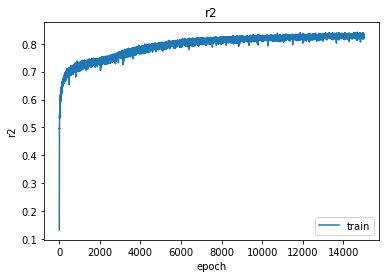

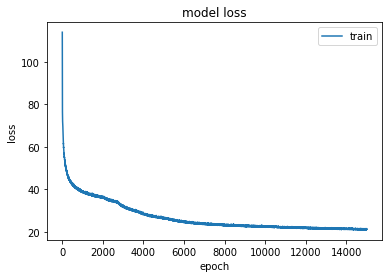

In [82]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['r2_keras'][5:])
plt.title('r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Training Set R-Square= 0.873876870966


/home/sir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: genfromtxt: Empty input file: "valresults.csv"
  # Remove the CWD from sys.path while we load stuff.


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

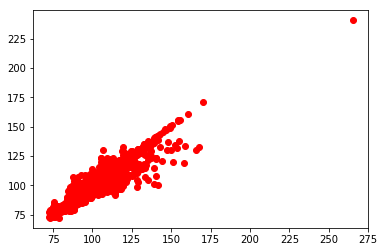

In [84]:
#Plot actual vs predition for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(y_train,TestResults,'ro')

#Compute R-Square value for training set
TestR2Value = r2_score(y_train,TestResults)
print("Training Set R-Square=", TestR2Value)

#Plot actual vs predition for validation set
ValResults = numpy.genfromtxt("valresults.csv", delimiter=",")
plt.plot(y_test,ValResults,'ro')

#Compute R-Square value for validation set
ValR2Value = r2_score(y_test,ValResults)
print("Validation Set R-Square=",ValR2Value)
